Notebook by: Antonina Dolgorukova

https://www.kaggle.com/code/antoninadolgorukova/cmi-piu-features-eda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
data_dict = pd.read_csv('../data/data_dictionary.csv')

In [4]:
display(train.head())
print(f"Train shape: {train.shape}")

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

Train shape: (3960, 82)


Target variable sii is defined as:

    0: None (PCIAT-PCIAT_Total from 0 to 30)
    1: Mild (PCIAT-PCIAT_Total from 31 to 49)
    2: Moderate (PCIAT-PCIAT_Total from 50 to 79)
    3: Severe (PCIAT-PCIAT_Total 80 and more)

In [5]:
data_dict.head()

Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   

               Description             Type                        Values  \
0         Participant's ID              str                           NaN   
1     Season of enrollment              str  Spring, Summer, Fall, Winter   
2       Age of participant            float                           NaN   
3       Sex of participant  categorical int                           0,1   
4  Season of participation              str  Spring, Summer, Fall, Winter   

       Value Labels  
0               NaN  
1               NaN  
2               NaN  
3  0=Male, 1=Female  
4               NaN

In [6]:
def calculate_stats(data, columns):
    if isinstance(columns, str):
        columns = [columns]

    stats = []
    for col in columns:
        if data[col].dtype in ['object', 'category']:
            counts = data[col].value_counts(dropna=False, sort=False)
            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'
            stats_col = pd.DataFrame({'count (%)': formatted})
            stats.append(stats_col)
        else:
            stats_col = data[col].describe().to_frame().transpose()
            stats_col['missing'] = data[col].isnull().sum()
            stats_col.index.name = col
            stats.append(stats_col)

    return pd.concat(stats, axis=0)

In [7]:
train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))
data_dict[data_dict['Field'].isin(columns_not_in_test)] # getting a grasp of what the columns that are not in the test set are

Instrument              Field  \
54  Parent-Child Internet Addiction Test       PCIAT-Season   
55  Parent-Child Internet Addiction Test     PCIAT-PCIAT_01   
56  Parent-Child Internet Addiction Test     PCIAT-PCIAT_02   
57  Parent-Child Internet Addiction Test     PCIAT-PCIAT_03   
58  Parent-Child Internet Addiction Test     PCIAT-PCIAT_04   
59  Parent-Child Internet Addiction Test     PCIAT-PCIAT_05   
60  Parent-Child Internet Addiction Test     PCIAT-PCIAT_06   
61  Parent-Child Internet Addiction Test     PCIAT-PCIAT_07   
62  Parent-Child Internet Addiction Test     PCIAT-PCIAT_08   
63  Parent-Child Internet Addiction Test     PCIAT-PCIAT_09   
64  Parent-Child Internet Addiction Test     PCIAT-PCIAT_10   
65  Parent-Child Internet Addiction Test     PCIAT-PCIAT_11   
66  Parent-Child Internet Addiction Test     PCIAT-PCIAT_12   
67  Parent-Child Internet Addiction Test     PCIAT-PCIAT_13   
68  Parent-Child Internet Addiction Test     PCIAT-PCIAT_14   
69  Parent-Child Internet Addiction Test     PCIAT-PCIAT_15   
70  Parent-Child Internet Addiction Test     PCIAT-PCIAT_16   
71  Parent-Child Internet Addiction Test     PCIAT-PCIAT_17   
72  Parent-Child Internet Addiction Test     PCIAT-PCIAT_18   
73  Parent-Child Internet Addiction Test     PCIAT-PCIAT_19   
74  Parent-Child Internet Addiction Test     PCIAT-PCIAT_20   
75  Parent-Child Internet Addiction Test  PCIAT-PCIAT_Total   

                                          Description             Type  \
54                            Season of participation              str   
55  How often does your child disobey time limits ...  categorical int   
56  How often does your child neglect household ch...  categorical int   
57  How often does your child prefer to spend time...  categorical int   
58  How often does your child form new relationshi...  categorical int   
59  How often do you complain about the amount of ...  categorical int   
60  How often do your child's grades suffer becaus...  categorical int   
61  How often does your child check his or her e-m...  categorical int   
62  How often does your child seem withdrawn from ...  categorical int   
63  How often does your child become defensive or ...  categorical int   
64  How often have you caught your child sneaking ...  categorical int   
65  How often does your child spend time along in ...  categorical int   
66  How often does your child receive strange phon...  categorical int   
67  How often does your child snap, yell, or act a...  categorical int   
68  How often does your child seem more tired and ...  categorical int   
69  How often does your child seem preoccupied wit...  categorical int   
70  How often does your child throw tantrums with ...  categorical int   
71  How often does your child choose to spend time...  categorical int   
72  How often does your child become angry or bell...  categorical int   
73  How often does your child choose to spend more...  categorical int   
74  How often does your child feel depressed, mood...  categorical int   
75                                        Total Score              int   

                          Values  \
54  Spring, Summer, Fall, Winter   
55                   0,1,2,3,4,5   
56                   0,1,2,3,4,5   
57                   0,1,2,3,4,5   
58                   0,1,2,3,4,5   
59                   0,1,2,3,4,5   
60                   0,1,2,3,4,5   
61                   0,1,2,3,4,5   
62                   0,1,2,3,4,5   
63                   0,1,2,3,4,5   
64                   0,1,2,3,4,5   
65                   0,1,2,3,4,5   
66                   0,1,2,3,4,5   
67                   0,1,2,3,4,5   
68                   0,1,2,3,4,5   
69                   0,1,2,3,4,5   
70                   0,1,2,3,4,5   
71                   0,1,2,3,4,5   
72                   0,1,2,3,4,5   
73                   0,1,2,3,4,5   
74                   0,1,2,3,4,5   
75                           NaN   

                                         Value L

In [8]:
pciat_min_max = train.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min', 'max'])
pciat_min_max = pciat_min_max.rename(
    columns={'min': 'Minimum PCIAT total Score', 'max': 'Maximum total PCIAT Score'}
)
pciat_min_max

Minimum PCIAT total Score  Maximum total PCIAT Score
sii                                                      
0.0                        0.0                       30.0
1.0                       31.0                       49.0
2.0                       50.0                       79.0
3.0                       80.0                       93.0

In [9]:
data_dict[data_dict['Field'] == 'PCIAT-PCIAT_Total']['Value Labels'].iloc[0]

'Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe'

In [10]:
train_with_sii = train[train['sii'].notna()][columns_not_in_test]
train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

In [11]:
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]

def recalculate_sii(row):
    """
    Recalculates the SII based on the PCIAT-PCIAT_Total and the number of missing values in the PCIAT columns.
    """
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

In [12]:
train['sii'] = train['recalc_sii']
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(
    train[PCIAT_cols].notna().all(axis=1), np.nan
)

sii_map = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}
train['sii'] = train['sii'].map(sii_map).fillna('Missing')

sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
train['sii'] = pd.Categorical(train['sii'], categories=sii_order, ordered=True)

train.drop(columns='recalc_sii', inplace=True)

# Visualisation

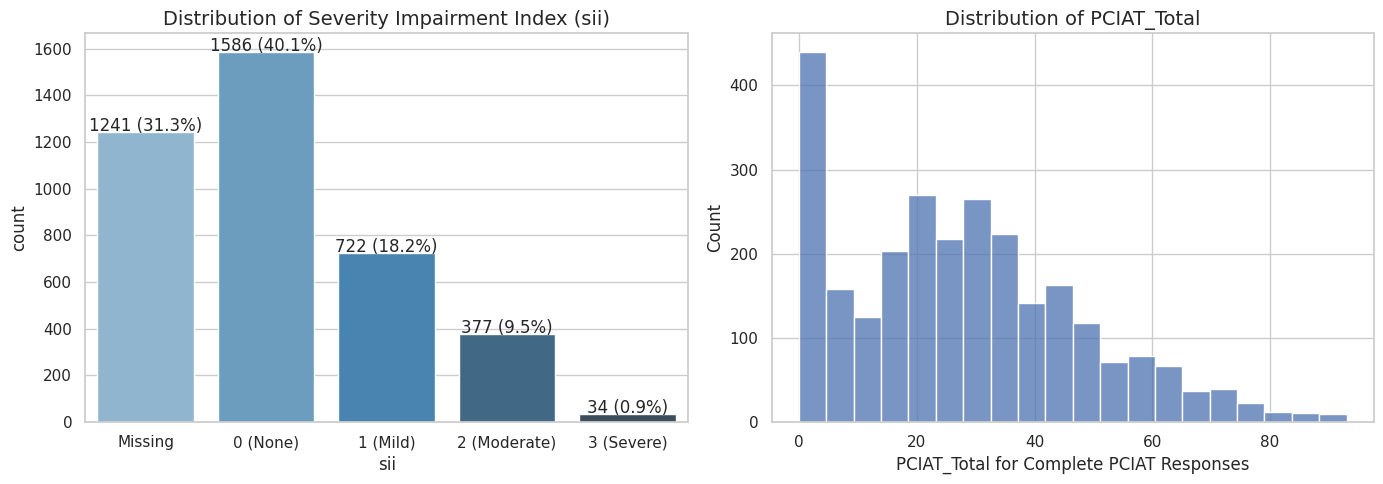

In [13]:
sii_counts = train['sii'].value_counts().reset_index()
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SII
sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues_d', ax=axes[0])
axes[0].set_title('Distribution of Severity Impairment Index (sii)', fontsize=14)
for p in axes[0].patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]
    axes[0].text(
        p.get_x() + p.get_width() / 2,
        height + 5, f'{int(height)} ({percentage:.1f}%)',
        ha="center", fontsize=12
    )

# PCIAT_Total for complete responses
sns.histplot(train['complete_resp_total'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of PCIAT_Total', fontsize=14)
axes[1].set_xlabel('PCIAT_Total for Complete PCIAT Responses')

plt.tight_layout()
plt.show()

## Age and Sex

In [14]:
train['Age Group'] = pd.cut(
    train['Basic_Demos-Age'],
    bins=[4, 12, 18, 22],
    labels=['Children (5-12)', 'Adolescents (13-18)', 'Adults (19-22)']
)
calculate_stats(train, 'Age Group')

count (%)
Age Group                         
Children (5-12)      2919 (73.71%)
Adolescents (13-18)   953 (24.07%)
Adults (19-22)          88 (2.22%)

In [15]:
sex_map = {0: 'Male', 1: 'Female'}
train['Basic_Demos-Sex'] = train['Basic_Demos-Sex'].map(sex_map)
calculate_stats(train, 'Basic_Demos-Sex')

count (%)
Basic_Demos-Sex               
Male             2484 (62.73%)
Female           1476 (37.27%)

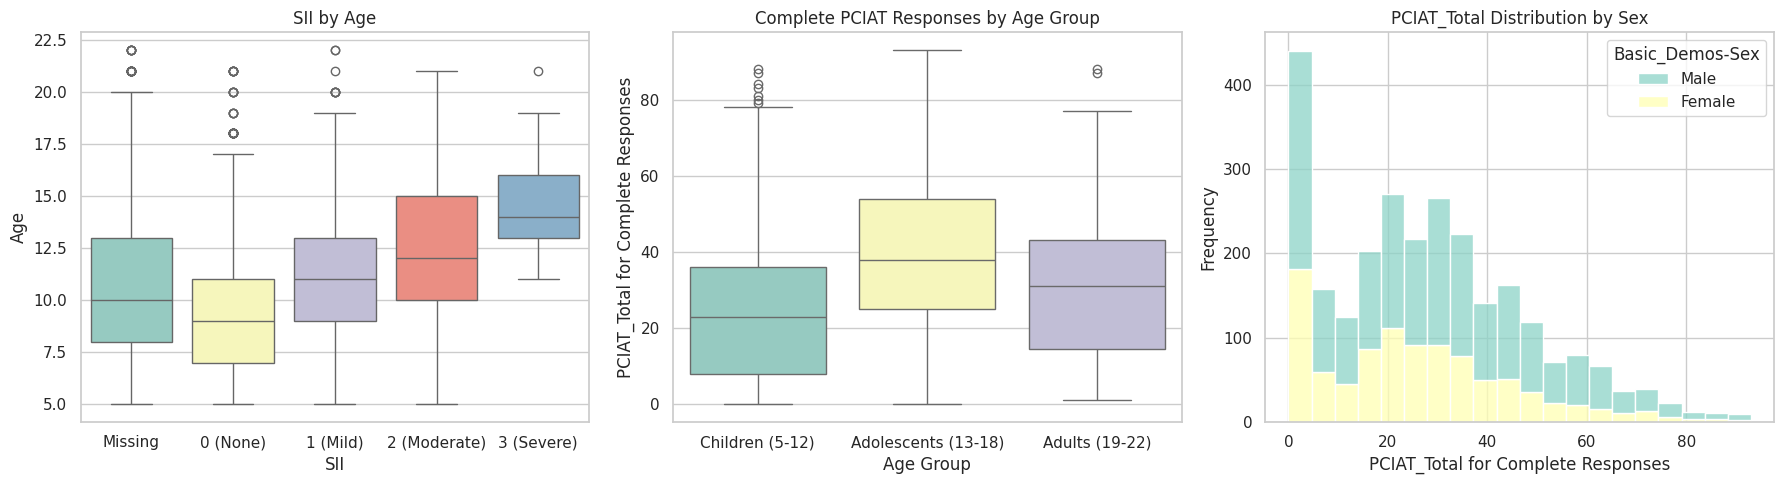

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SII by Age
sns.boxplot(y=train['Basic_Demos-Age'], x=train['sii'], ax=axes[0], palette="Set3")
axes[0].set_title('SII by Age')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('SII')

# Complete PCIAT Responses by Age Group
sns.boxplot(
    x='Age Group', y='complete_resp_total',
    data=train, palette="Set3", ax=axes[1]
)
axes[1].set_title('Complete PCIAT Responses by Age Group')
axes[1].set_ylabel('PCIAT_Total for Complete Responses')
axes[1].set_xlabel('Age Group')

# PCIAT_Total by Sex
sns.histplot(
    data=train, x='complete_resp_total',
    hue='Basic_Demos-Sex', multiple='stack',
    palette="Set3", bins=20, ax=axes[2]
)
axes[2].set_title('PCIAT_Total Distribution by Sex')
axes[2].set_xlabel('PCIAT_Total for Complete Responses')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

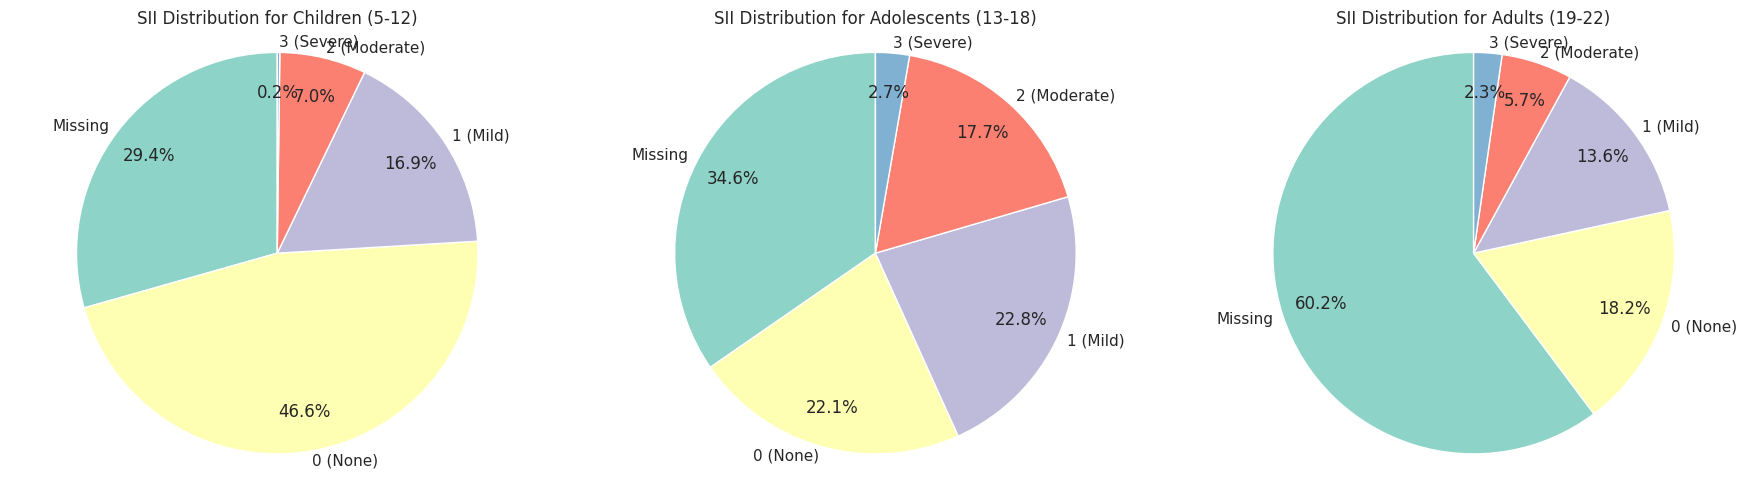

In [17]:
stats = train.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group] / stats.loc[age_group].sum()
    axes[i].pie(
        group_counts, labels=group_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"),
        labeldistance=1.05, pctdistance=0.80
    )
    axes[i].set_title(f'SII Distribution for {age_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

In [18]:
stats = train.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

sii                      Missing      0 (None)     1 (Mild) 2 (Moderate)  \
Age Group                                                                  
Children (5-12)      858 (29.4%)  1359 (46.6%)  493 (16.9%)   203 (7.0%)   
Adolescents (13-18)  330 (34.6%)   211 (22.1%)  217 (22.8%)  169 (17.7%)   
Adults (19-22)        53 (60.2%)    16 (18.2%)   12 (13.6%)     5 (5.7%)   

sii                 3 (Severe)  
Age Group                       
Children (5-12)       6 (0.2%)  
Adolescents (13-18)  26 (2.7%)  
Adults (19-22)        2 (2.3%)

In [19]:
stats = train[train['sii'] != 'Missing'].groupby(
    ['Age Group', 'sii']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats


sii                   Missing      0 (None)     1 (Mild) 2 (Moderate)  \
Age Group                                                               
Children (5-12)      0 (0.0%)  1359 (65.9%)  493 (23.9%)   203 (9.8%)   
Adolescents (13-18)  0 (0.0%)   211 (33.9%)  217 (34.8%)  169 (27.1%)   
Adults (19-22)       0 (0.0%)    16 (45.7%)   12 (34.3%)    5 (14.3%)   

sii                 3 (Severe)  
Age Group                       
Children (5-12)       6 (0.3%)  
Adolescents (13-18)  26 (4.2%)  
Adults (19-22)        2 (5.7%)

## Internet Usage

In [20]:
data = train[train['PreInt_EduHx-computerinternet_hoursday'].notna()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with measured PreInt_EduHx-computerinternet_hoursday data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with measured PreInt_EduHx-computerinternet_hoursday data: 5 - 22 years


In [21]:
train['PreInt_EduHx-computerinternet_hoursday'].unique()

array([ 3.,  0.,  2., nan,  1.])

In [22]:
param_map = {0: '< 1h/day', 1: '~ 1h/day', 2: '~ 2hs/day', 3: '> 3hs/day'}
train['internet_use_encoded'] = train[
    'PreInt_EduHx-computerinternet_hoursday'
].map(param_map).fillna('Missing')

param_ord = ['Missing', '< 1h/day', '~ 1h/day', '~ 2hs/day', '> 3hs/day']
train['internet_use_encoded'] = pd.Categorical(
    train['internet_use_encoded'], categories=param_ord,
    ordered=True
)
calculate_stats(train, 'PreInt_EduHx-Season')

count (%)
PreInt_EduHx-Season              
Fall                 828 (20.91%)
Summer               821 (20.73%)
Winter               906 (22.88%)
NaN                  420 (10.61%)
Spring               985 (24.87%)

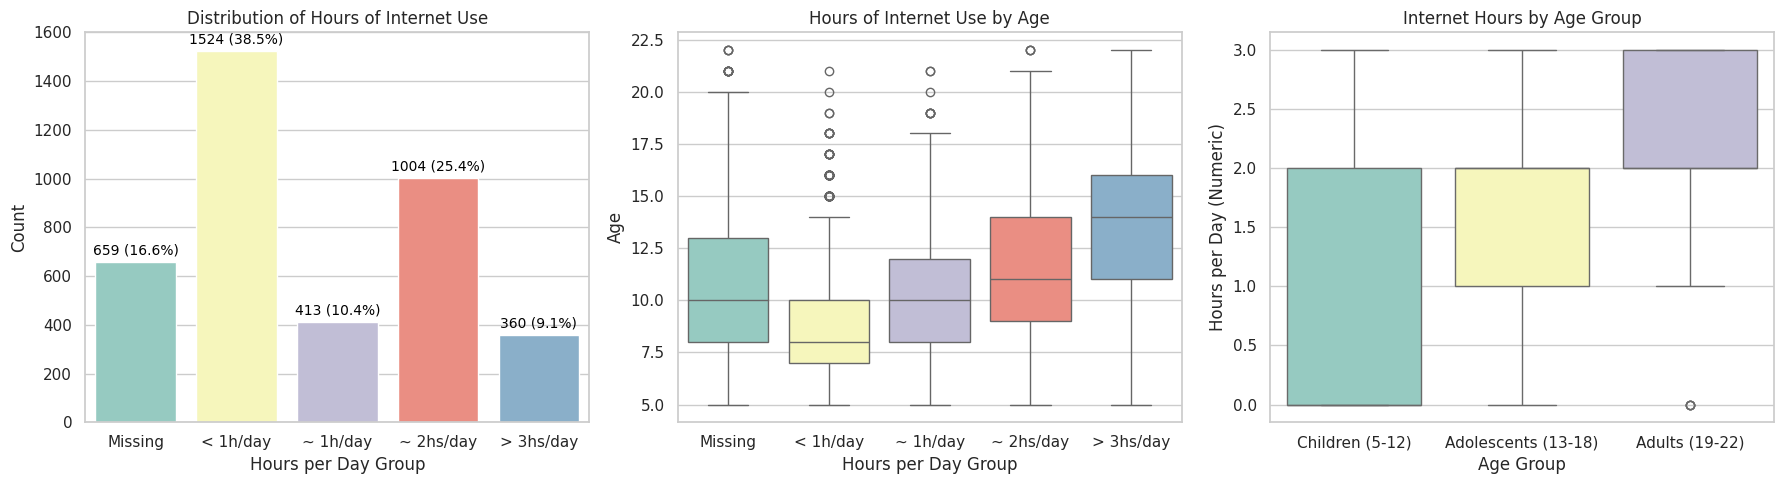

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hours of Internet Use
ax1 = sns.countplot(x='internet_use_encoded', data=train, palette="Set3", ax=axes[0])
axes[0].set_title('Distribution of Hours of Internet Use')
axes[0].set_xlabel('Hours per Day Group')
axes[0].set_ylabel('Count')

total = len(train['internet_use_encoded'])
for p in ax1.patches:
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    ax1.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Hours of Internet Use by Age
sns.boxplot(y=train['Basic_Demos-Age'], x=train['internet_use_encoded'], ax=axes[1], palette="Set3")
axes[1].set_title('Hours of Internet Use by Age')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Hours per Day Group')

# Hours of Internet Use (numeric) by Age Group
sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age Group', data=train, ax=axes[2], palette="Set3")
axes[2].set_title('Internet Hours by Age Group')
axes[2].set_ylabel('Hours per Day (Numeric)')
axes[2].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

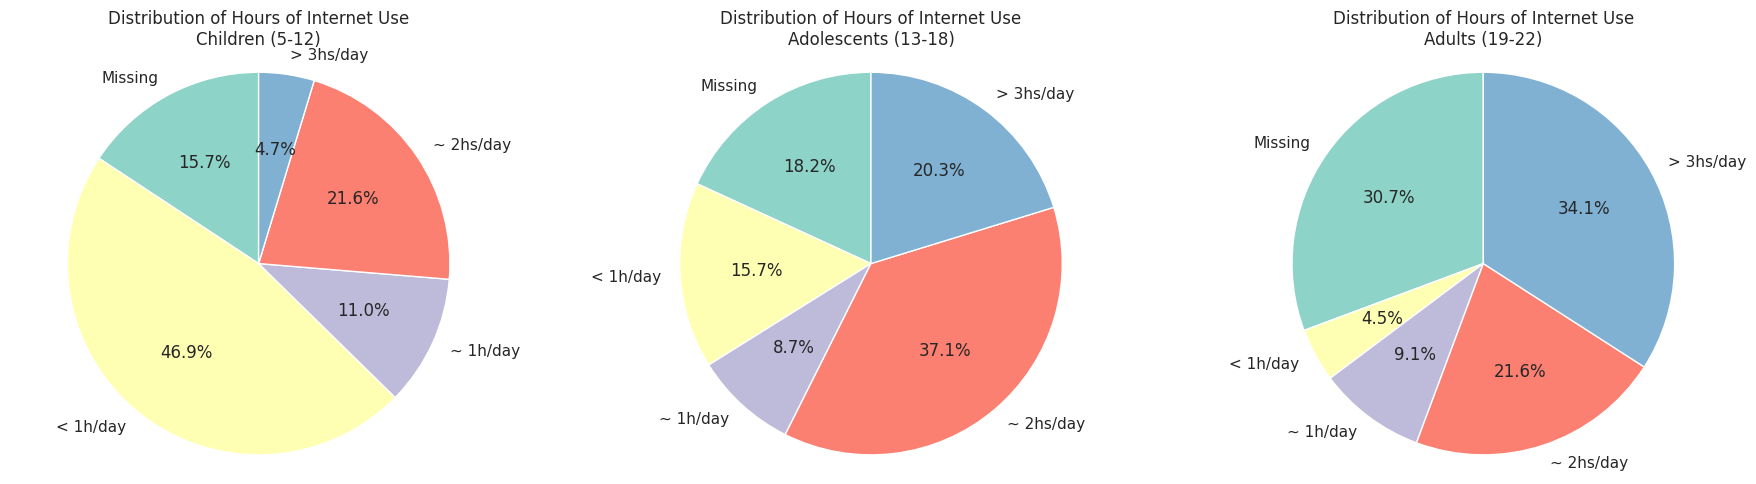

In [24]:
stats = train.groupby(
    ['Age Group', 'internet_use_encoded']
).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group] / stats.loc[age_group].sum()
    axes[i].pie(group_counts, labels=group_counts.index, autopct='%1.1f%%',
                startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1)
    axes[i].set_title(f'Distribution of Hours of Internet Use\n{age_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

In [25]:
train_non_na = train.dropna(subset=['PreInt_EduHx-computerinternet_hoursday'])
rows = (train_non_na['PreInt_EduHx-computerinternet_hoursday'] == 3).sum()
print(f"Non-NA Rows - Internet use 3h or more: {(rows / len(train_non_na)) * 100:.2f}%")

rows = (train_non_na['PreInt_EduHx-computerinternet_hoursday'] == 0).sum()
print(f"Non-NA Rows - Internet use 1h or less: {(rows / len(train_non_na)) * 100:.2f}%")

Non-NA Rows - Internet use 3h or more: 10.91%
Non-NA Rows - Internet use 1h or less: 46.17%


In [26]:
stats = train.groupby(['Basic_Demos-Sex', 'internet_use_encoded']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

internet_use_encoded      Missing     < 1h/day     ~ 1h/day    ~ 2hs/day  \
Basic_Demos-Sex                                                            
Female                271 (18.4%)  569 (38.6%)   139 (9.4%)  353 (23.9%)   
Male                  388 (15.6%)  955 (38.4%)  274 (11.0%)  651 (26.2%)   

internet_use_encoded   > 3hs/day  
Basic_Demos-Sex                   
Female                144 (9.8%)  
Male                  216 (8.7%)

## Internet usage vs sii

In [27]:
sii_reported = train[train['sii'] != "Missing"]
sii_reported.loc[:, 'sii'] = sii_reported['sii'].cat.remove_unused_categories()

stats = sii_reported.groupby(
    ['internet_use_encoded', 'sii']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

sii                      0 (None)     1 (Mild) 2 (Moderate) 3 (Severe)
internet_use_encoded                                                  
Missing                52 (63.4%)   15 (18.3%)   15 (18.3%)   0 (0.0%)
< 1h/day              933 (73.9%)  247 (19.6%)    78 (6.2%)   5 (0.4%)
~ 1h/day              160 (47.2%)  123 (36.3%)   54 (15.9%)   2 (0.6%)
~ 2hs/day             366 (47.2%)  251 (32.3%)  147 (18.9%)  12 (1.5%)
> 3hs/day              75 (29.0%)   86 (33.2%)   83 (32.0%)  15 (5.8%)

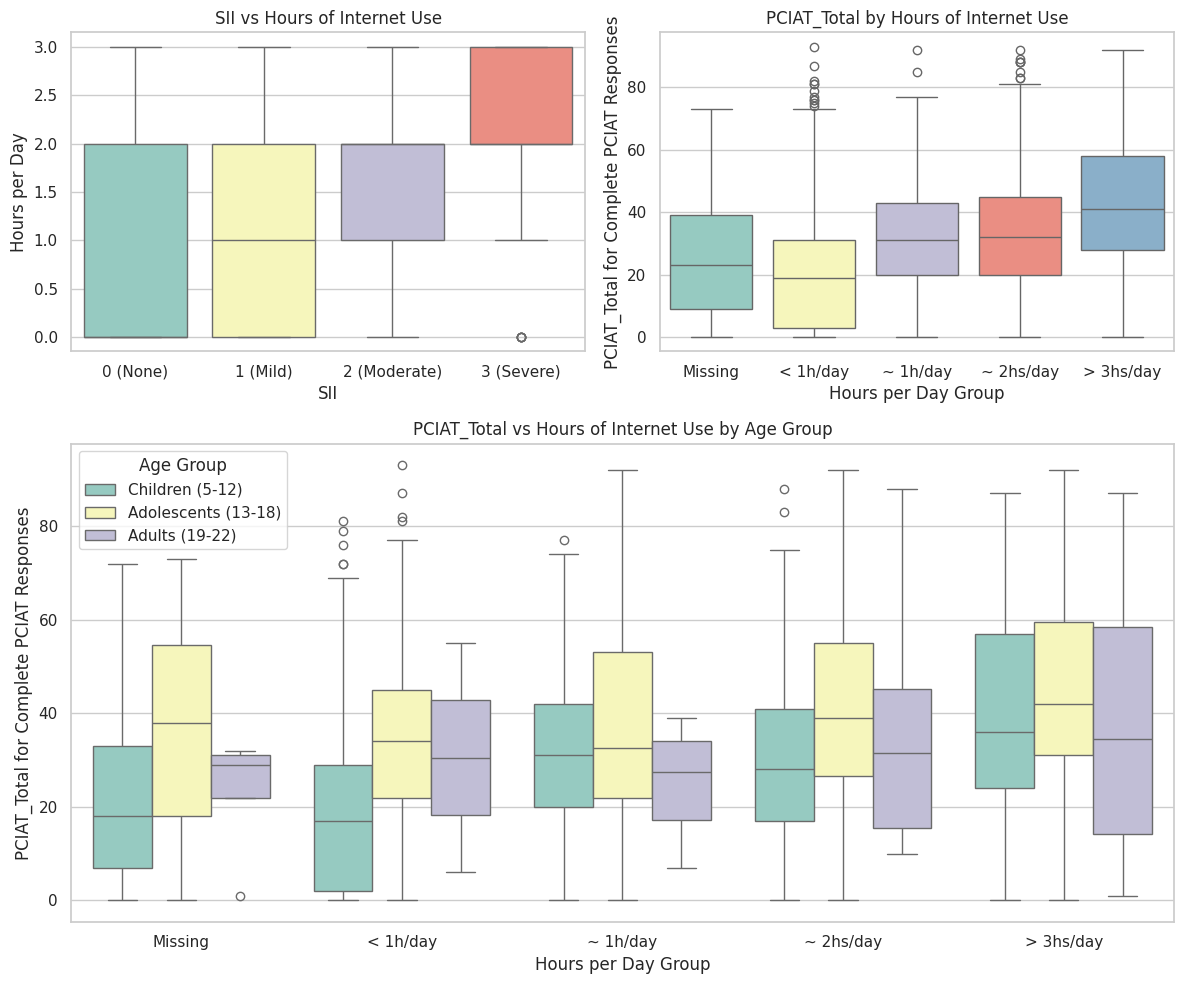

In [28]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.5])

# SII vs Hours of Internet Use
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(
    x='sii', y='PreInt_EduHx-computerinternet_hoursday',
    data=sii_reported,
    ax=ax1, palette="Set3"
)
ax1.set_title('SII vs Hours of Internet Use')
ax1.set_ylabel('Hours per Day')
ax1.set_xlabel('SII')

# PCIAT_Total for Complete PCIAT Responses by Hours of Internet Use
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(
    x='internet_use_encoded', y='complete_resp_total',
    data=sii_reported,
    palette="Set3", ax=ax2
)
ax2.set_title('PCIAT_Total by Hours of Internet Use')
ax2.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax2.set_xlabel('Hours per Day Group')

# SII vs Hours of Internet Use by Age Group (Full width)
ax3 = fig.add_subplot(gs[1, :])
sns.boxplot(
    x='internet_use_encoded', y='complete_resp_total',
    data=sii_reported,
    hue='Age Group', ax=ax3, palette="Set3"
)
ax3.set_title('PCIAT_Total vs Hours of Internet Use by Age Group')
ax3.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax3.set_xlabel('Hours per Day Group')

plt.tight_layout()
plt.show()

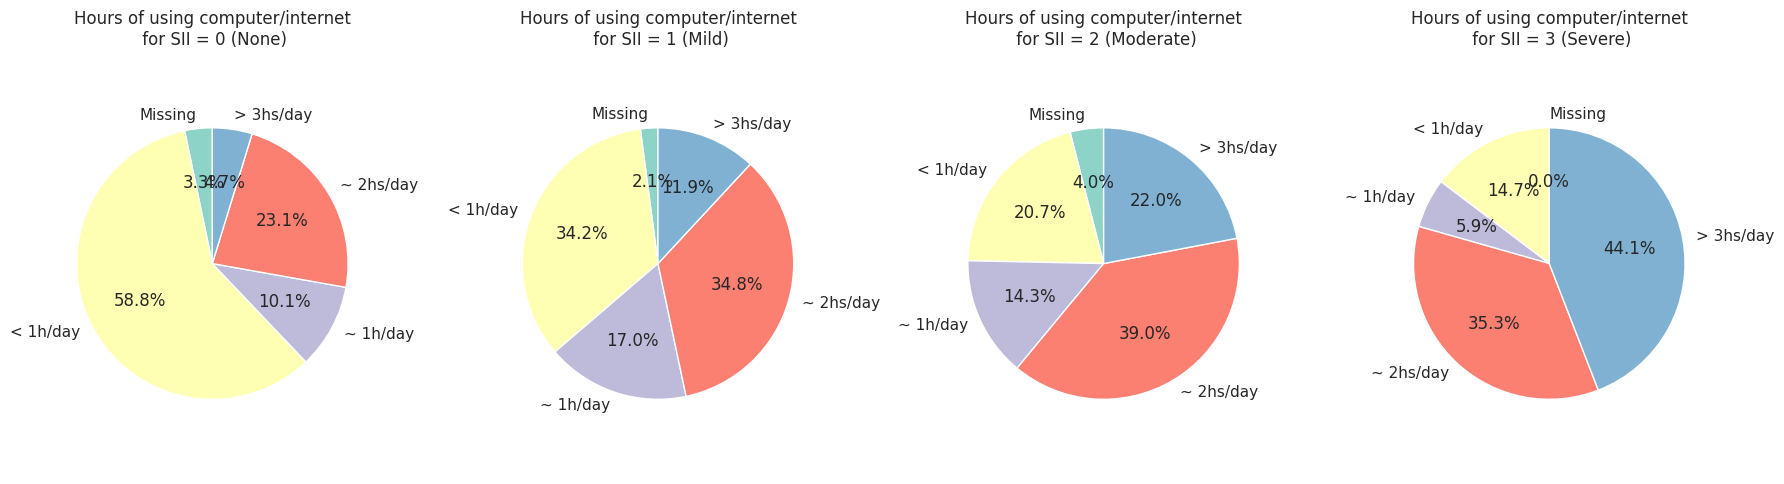

In [29]:
stats = sii_reported.groupby(
    ['sii', 'internet_use_encoded']
).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))

for i, sii_group in enumerate(stats.index):
    group_counts = stats.loc[sii_group] / stats.loc[sii_group].sum()
    axes[i].pie(
        group_counts, labels=group_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set3"), labeldistance=1.1
    )
    axes[i].set_title(f'Hours of using computer/internet\n for SII = {sii_group}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

In [30]:
stats = sii_reported.groupby(
    ['sii', 'internet_use_encoded']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

internet_use_encoded    Missing     < 1h/day     ~ 1h/day    ~ 2hs/day  \
sii                                                                      
0 (None)              52 (3.3%)  933 (58.8%)  160 (10.1%)  366 (23.1%)   
1 (Mild)              15 (2.1%)  247 (34.2%)  123 (17.0%)  251 (34.8%)   
2 (Moderate)          15 (4.0%)   78 (20.7%)   54 (14.3%)  147 (39.0%)   
3 (Severe)             0 (0.0%)    5 (14.7%)     2 (5.9%)   12 (35.3%)   

internet_use_encoded   > 3hs/day  
sii                               
0 (None)               75 (4.7%)  
1 (Mild)              86 (11.9%)  
2 (Moderate)          83 (22.0%)  
3 (Severe)            15 (44.1%)

In [31]:
train[
    (train['internet_use_encoded'] == '< 1h/day') & 
    (train['sii'].isin(['2 (Moderate)', '3 (Severe)']))
]['Basic_Demos-Age'].describe()

count    83.000000
mean     10.626506
std       3.083041
min       5.000000
25%       8.500000
50%      10.000000
75%      12.500000
max      21.000000
Name: Basic_Demos-Age, dtype: float64

# By Groups

In [32]:
groups = data_dict.groupby('Instrument')['Field'].apply(list).to_dict()

for instrument, features in groups.items():
    print(f"{instrument}: {features}\n")

Bio-electric Impedance Analysis: ['BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']

Children's Global Assessment Scale: ['CGAS-Season', 'CGAS-CGAS_Score']

Demographics: ['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']

FitnessGram Child: ['FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']

FitnessGram Vitals and Treadmill: ['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']

Identifier: ['id']

Internet Use: ['PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday']

P

In [33]:
season_columns = [col for col in train.columns if 'Season' in col]
season_df = train[season_columns]
season_df

Basic_Demos-Enroll_Season CGAS-Season Physical-Season  \
0                         Fall      Winter            Fall   
1                       Summer         NaN            Fall   
2                       Summer        Fall            Fall   
3                       Winter        Fall          Summer   
4                       Spring      Summer             NaN   
...                        ...         ...             ...   
3955                      Fall      Spring            Fall   
3956                    Winter         NaN          Spring   
3957                      Fall      Spring          Winter   
3958                    Spring      Spring          Winter   
3959                    Spring         NaN          Winter   

     Fitness_Endurance-Season FGC-Season BIA-Season PAQ_A-Season PAQ_C-Season  \
0                         NaN       Fall       Fall          NaN          NaN   
1                         NaN       Fall     Winter          NaN         Fall   
2                        Fall       Fall        NaN          NaN       Summer   
3                      Summer     Summer     Summer          NaN       Winter   
4                         NaN        NaN        NaN       Summer          NaN   
...                       ...        ...        ...          ...          ...   
3955                      NaN       Fall       Fall          NaN       Winter   
3956                      NaN     Spring     Spring          NaN       Winter   
3957                      NaN     Winter     Winter          NaN       Winter   
3958                      NaN     Spring     Summer          NaN       Spring   
3959                      NaN     Winter        NaN          NaN          NaN   

     PCIAT-Season SDS-Season PreInt_EduHx-Season  
0            Fall        NaN                Fall  
1            Fall       Fall              Summer  
2            Fall       Fall              Summer  
3          Summer     Summer              Winter  
4             NaN        NaN                 NaN  
...           ...        ...                 ...  
3955       Winter     Winter                Fall  
3956          NaN        NaN              Winter  
3957       Winter     Winter                Fall  
3958       Spring     Spring              Spring  
3959          NaN        NaN              Spring  

[3960 rows x 11 columns]

In [34]:
train[season_columns] = train[season_columns].fillna("Missing")

In [35]:
data_dict = data_dict[data_dict['Instrument'] != 'Parent-Child Internet Addiction Test']
continuous_cols = data_dict[data_dict['Type'].str.contains(
    'float|int', case=False
)]['Field'].tolist()


In [38]:
groups["Demographics"]

['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']

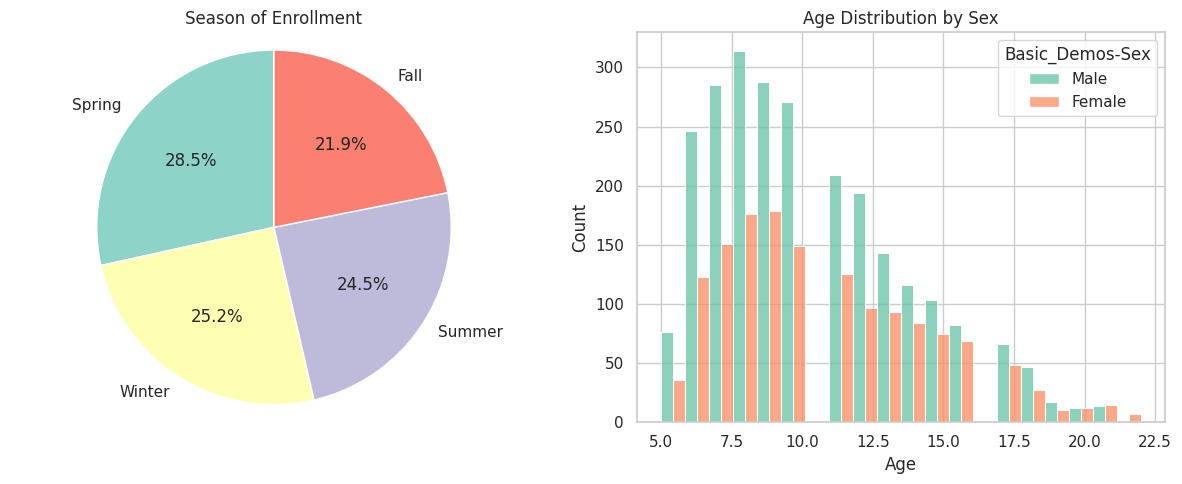

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Season of Enrollment
season_counts = train['Basic_Demos-Enroll_Season'].value_counts(dropna=False)

axes[0].pie(
    season_counts, labels=season_counts.index,
    autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("Set3")
)
axes[0].set_title('Season of Enrollment')
axes[0].axis('equal')

# Age Distribution by Sex
sns.histplot(
    data=train, x='Basic_Demos-Age',
    hue='Basic_Demos-Sex', multiple='dodge',
    palette="Set2", bins=20, ax=axes[1]
)
axes[1].set_title('Age Distribution by Sex')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [40]:
groups["Children's Global Assessment Scale"]

['CGAS-Season', 'CGAS-CGAS_Score']

In [41]:
data = train[train['CGAS-CGAS_Score'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with CGAS-CGAS_Score data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with CGAS-CGAS_Score data: 5 - 22 years


In [42]:
train[train['CGAS-CGAS_Score'] > 100]

id Basic_Demos-Enroll_Season  Basic_Demos-Age Basic_Demos-Sex  \
2065  83525bbe                      Fall               11          Female   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
2065      Winter            999.0            Fall           NaN   

      Physical-Height  Physical-Weight  ...  PCIAT-PCIAT_Total  SDS-Season  \
2065              NaN              NaN  ...                NaN     Missing   

      SDS-SDS_Total_Raw  SDS-SDS_Total_T PreInt_EduHx-Season  \
2065                NaN              NaN                Fall   

      PreInt_EduHx-computerinternet_hoursday      sii  complete_resp_total  \
2065                                     3.0  Missing                  NaN   

            Age Group  internet_use_encoded  
2065  Children (5-12)             > 3hs/day  

[1 rows x 85 columns]

In [43]:
train.loc[train['CGAS-CGAS_Score'] == 999, 'CGAS-CGAS_Score'] = np.nan

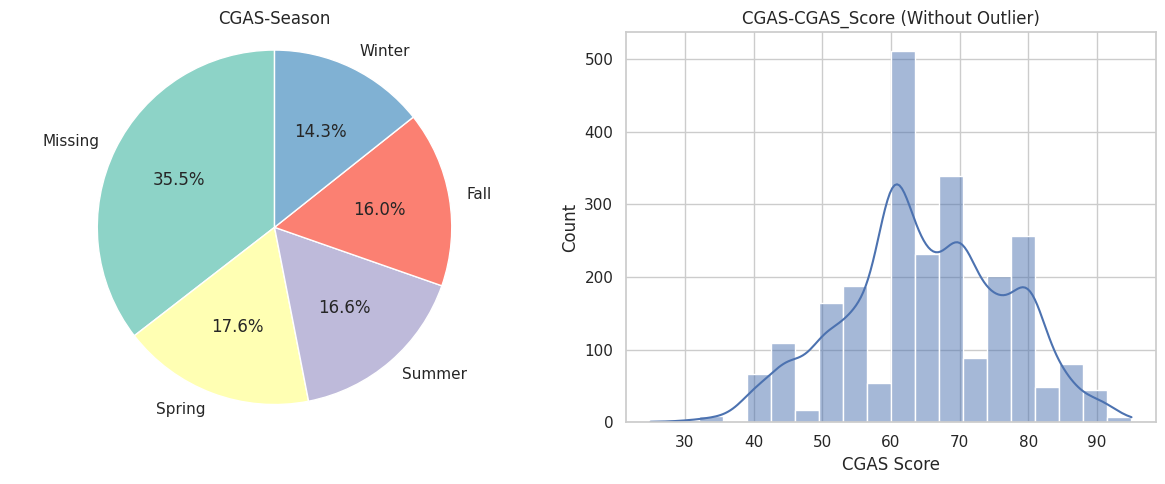

In [44]:
plt.figure(figsize=(12, 5))

# CGAS-Season
plt.subplot(1, 2, 1)
cgas_season_counts = train['CGAS-Season'].value_counts(normalize=True)
plt.pie(
    cgas_season_counts, 
    labels=cgas_season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
plt.title('CGAS-Season')
plt.axis('equal')

# CGAS-CGAS_Score without outliers (score == 999)
plt.subplot(1, 2, 2)
sns.histplot(
    train['CGAS-CGAS_Score'].dropna(),
    bins=20, kde=True
)
plt.title('CGAS-CGAS_Score (Without Outlier)')
plt.xlabel('CGAS Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

CGAS is a rating of general functioning for children and young people aged 4-16 years old. The CGAS asks the clinician to rate the child from 1 to 100 based on their lowest level of functioning, regardless of treatment or prognosis, over a specified time period.

Since the CGAS is a measure of general functioning, and the SII reflects the severity of the impact of Internet use on that functioning, I expect this feature, along with Internet use, to be the most important in predicting the SII.

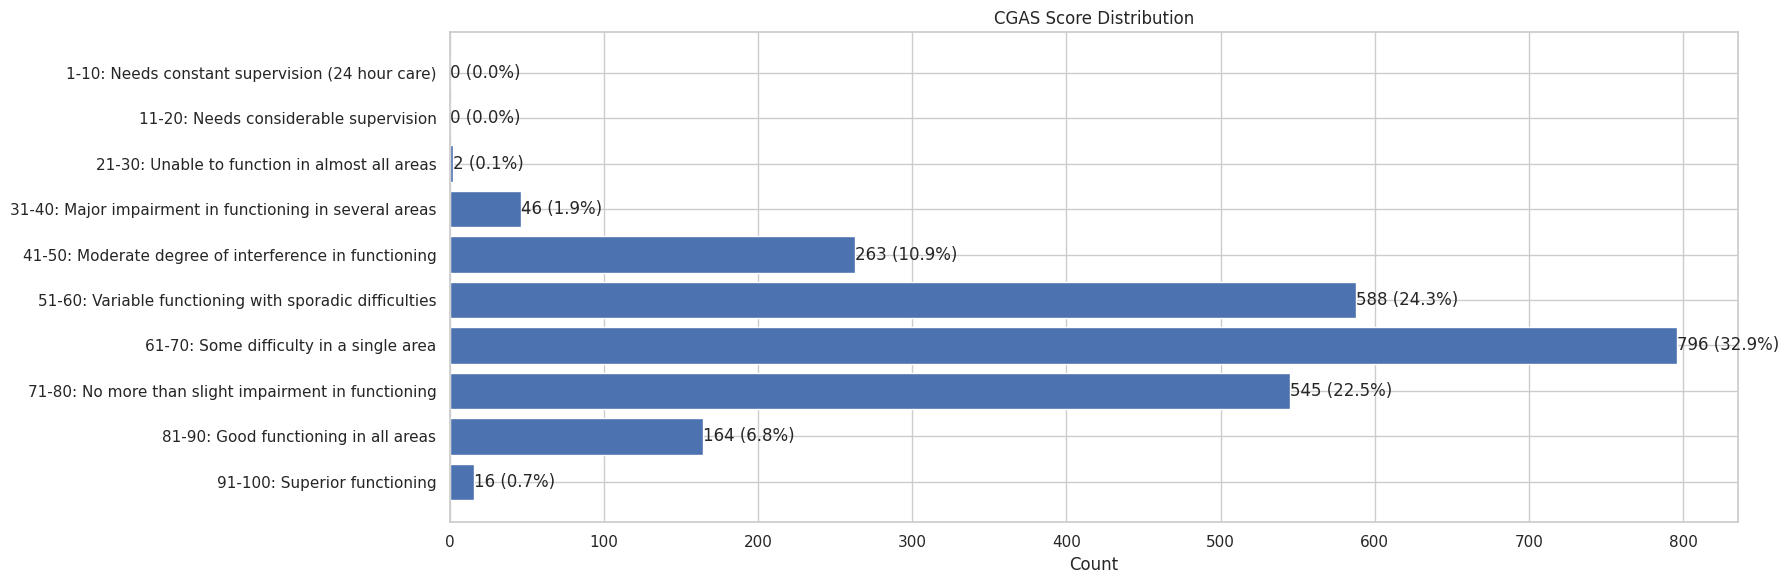

In [45]:
bins = np.arange(0, 101, 10)
labels = [
    "1-10: Needs constant supervision (24 hour care)",
    "11-20: Needs considerable supervision",
    "21-30: Unable to function in almost all areas",
    "31-40: Major impairment in functioning in several areas",
    "41-50: Moderate degree of interference in functioning",
    "51-60: Variable functioning with sporadic difficulties",
    "61-70: Some difficulty in a single area",
    "71-80: No more than slight impairment in functioning",
    "81-90: Good functioning in all areas",
    "91-100: Superior functioning"
]

train['CGAS_Score_Bin'] = pd.cut(
    train['CGAS-CGAS_Score'], bins=bins, labels=labels
)

counts = train['CGAS_Score_Bin'].value_counts().reindex(labels)
prop = (counts / counts.sum() * 100).round(1)
count_prop_labels = counts.astype(str) + " (" + prop.astype(str) + "%)"

plt.figure(figsize=(18, 6))
bars = plt.barh(labels, counts)
plt.xlabel('Count')
plt.title('CGAS Score Distribution')

for bar, label in zip(bars, count_prop_labels):
    plt.text(
        bar.get_width(), bar.get_y() + bar.get_height() / 2, label, va='center'
    )

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [46]:
train_filt = train.dropna(subset=['CGAS_Score_Bin', 'complete_resp_total'])
train_filt.loc[:, 'CGAS_Score_Bin'] = train_filt['CGAS_Score_Bin'].cat.remove_unused_categories()
train_filt.loc[:, 'sii'] = train_filt['sii'].cat.remove_unused_categories()
len(train_filt)

2288

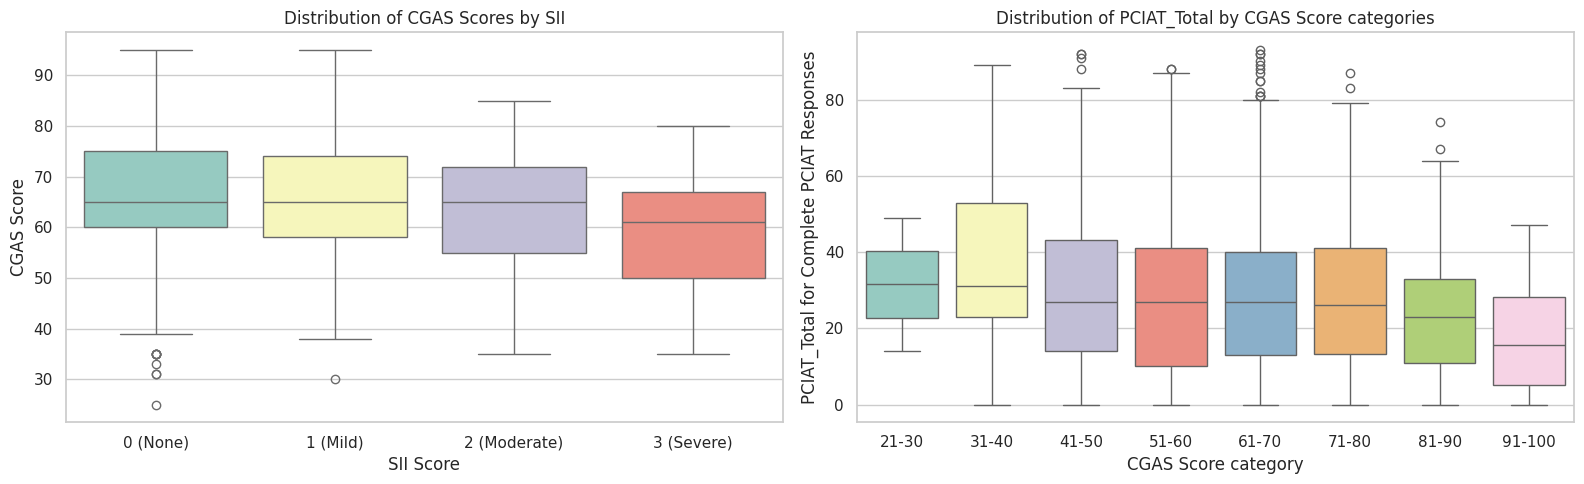

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# CGAS-CGAS_Score vs sii
sns.boxplot(
    data=train_filt,
    x='sii', y='CGAS-CGAS_Score',
    palette='Set3', ax=axes[0]
)
axes[0].set_xlabel('SII Score')
axes[0].set_ylabel('CGAS Score')
axes[0].set_title('Distribution of CGAS Scores by SII')

# complete_resp_total vs CGAS_Score_Bin
sns.boxplot(
    data=train_filt,
    x='CGAS_Score_Bin', y='complete_resp_total',
    ax=axes[1], palette='Set3'
)

# Get the tick positions and match the labels
range_labels = [label.split(":")[0] for label in train_filt['CGAS_Score_Bin'].cat.categories]
axes[1].set_xticklabels(range_labels)

axes[1].set_xlabel('CGAS Score category')
axes[1].set_ylabel('PCIAT_Total for Complete PCIAT Responses')
axes[1].set_title('Distribution of PCIAT_Total by CGAS Score categories')

plt.tight_layout()
plt.show()

In [48]:
score_min_max = train.groupby('sii')['CGAS-CGAS_Score'].agg(['min', 'max'])
score_min_max = score_min_max.rename(
    columns={'min': 'Minimum CGAS Score', 'max': 'Maximum CGAS Score'}
)
score_min_max

Minimum CGAS Score  Maximum CGAS Score
sii                                                 
Missing                     40.0                85.0
0 (None)                    25.0                95.0
1 (Mild)                    30.0                95.0
2 (Moderate)                35.0                85.0
3 (Severe)                  35.0                80.0

In [49]:
# participants with the worst global functioning
train_filt[train_filt['CGAS-CGAS_Score'] < 35][
    ['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii',
     'CGAS-CGAS_Score',
     'PreInt_EduHx-computerinternet_hoursday']
]

Basic_Demos-Age Basic_Demos-Sex       sii  CGAS-CGAS_Score  \
2417                9          Female  0 (None)             31.0   
2525               13          Female  1 (Mild)             30.0   
2555               15            Male  0 (None)             33.0   
3332               12            Male  0 (None)             25.0   
3858               15            Male  0 (None)             31.0   

      PreInt_EduHx-computerinternet_hoursday  
2417                                     0.0  
2525                                     0.0  
2555                                     2.0  
3332                                     2.0  
3858                                     3.0

In [50]:
# participants with the best global functioning
train[train['CGAS-CGAS_Score'] > 90][
    ['Basic_Demos-Age', 'Basic_Demos-Sex', 'sii',
     'CGAS-CGAS_Score',
     'PreInt_EduHx-computerinternet_hoursday']
]


Basic_Demos-Age Basic_Demos-Sex       sii  CGAS-CGAS_Score  \
310                13          Female  0 (None)             91.0   
591                10          Female  0 (None)             93.0   
667                13            Male  0 (None)             95.0   
910                10          Female  0 (None)             91.0   
1007               14            Male  1 (Mild)             95.0   
1157               14          Female  1 (Mild)             91.0   
1640               11          Female  0 (None)             92.0   
2342                6          Female  0 (None)             91.0   
2668               14          Female  0 (None)             92.0   
2675               11            Male  0 (None)             91.0   
2926                7            Male  0 (None)             95.0   
3165               17          Female  0 (None)             91.0   
3467               15          Female  0 (None)             91.0   
3484               14            Male  1 (Mild)             91.0   
3713                7          Female  0 (None)             95.0   
3749               10          Female  1 (Mild)             91.0   

      PreInt_EduHx-computerinternet_hoursday  
310                                      2.0  
591                                      NaN  
667                                      0.0  
910                                      0.0  
1007                                     0.0  
1157                                     2.0  
1640                                     0.0  
2342                                     0.0  
2668                                     0.0  
2675                                     0.0  
2926                                     0.0  
3165                                     1.0  
3467                                     0.0  
3484                                     3.0  
3713                                     0.0  
3749                                     2.0

In [52]:
groups["Physical Measures"]

['Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP']

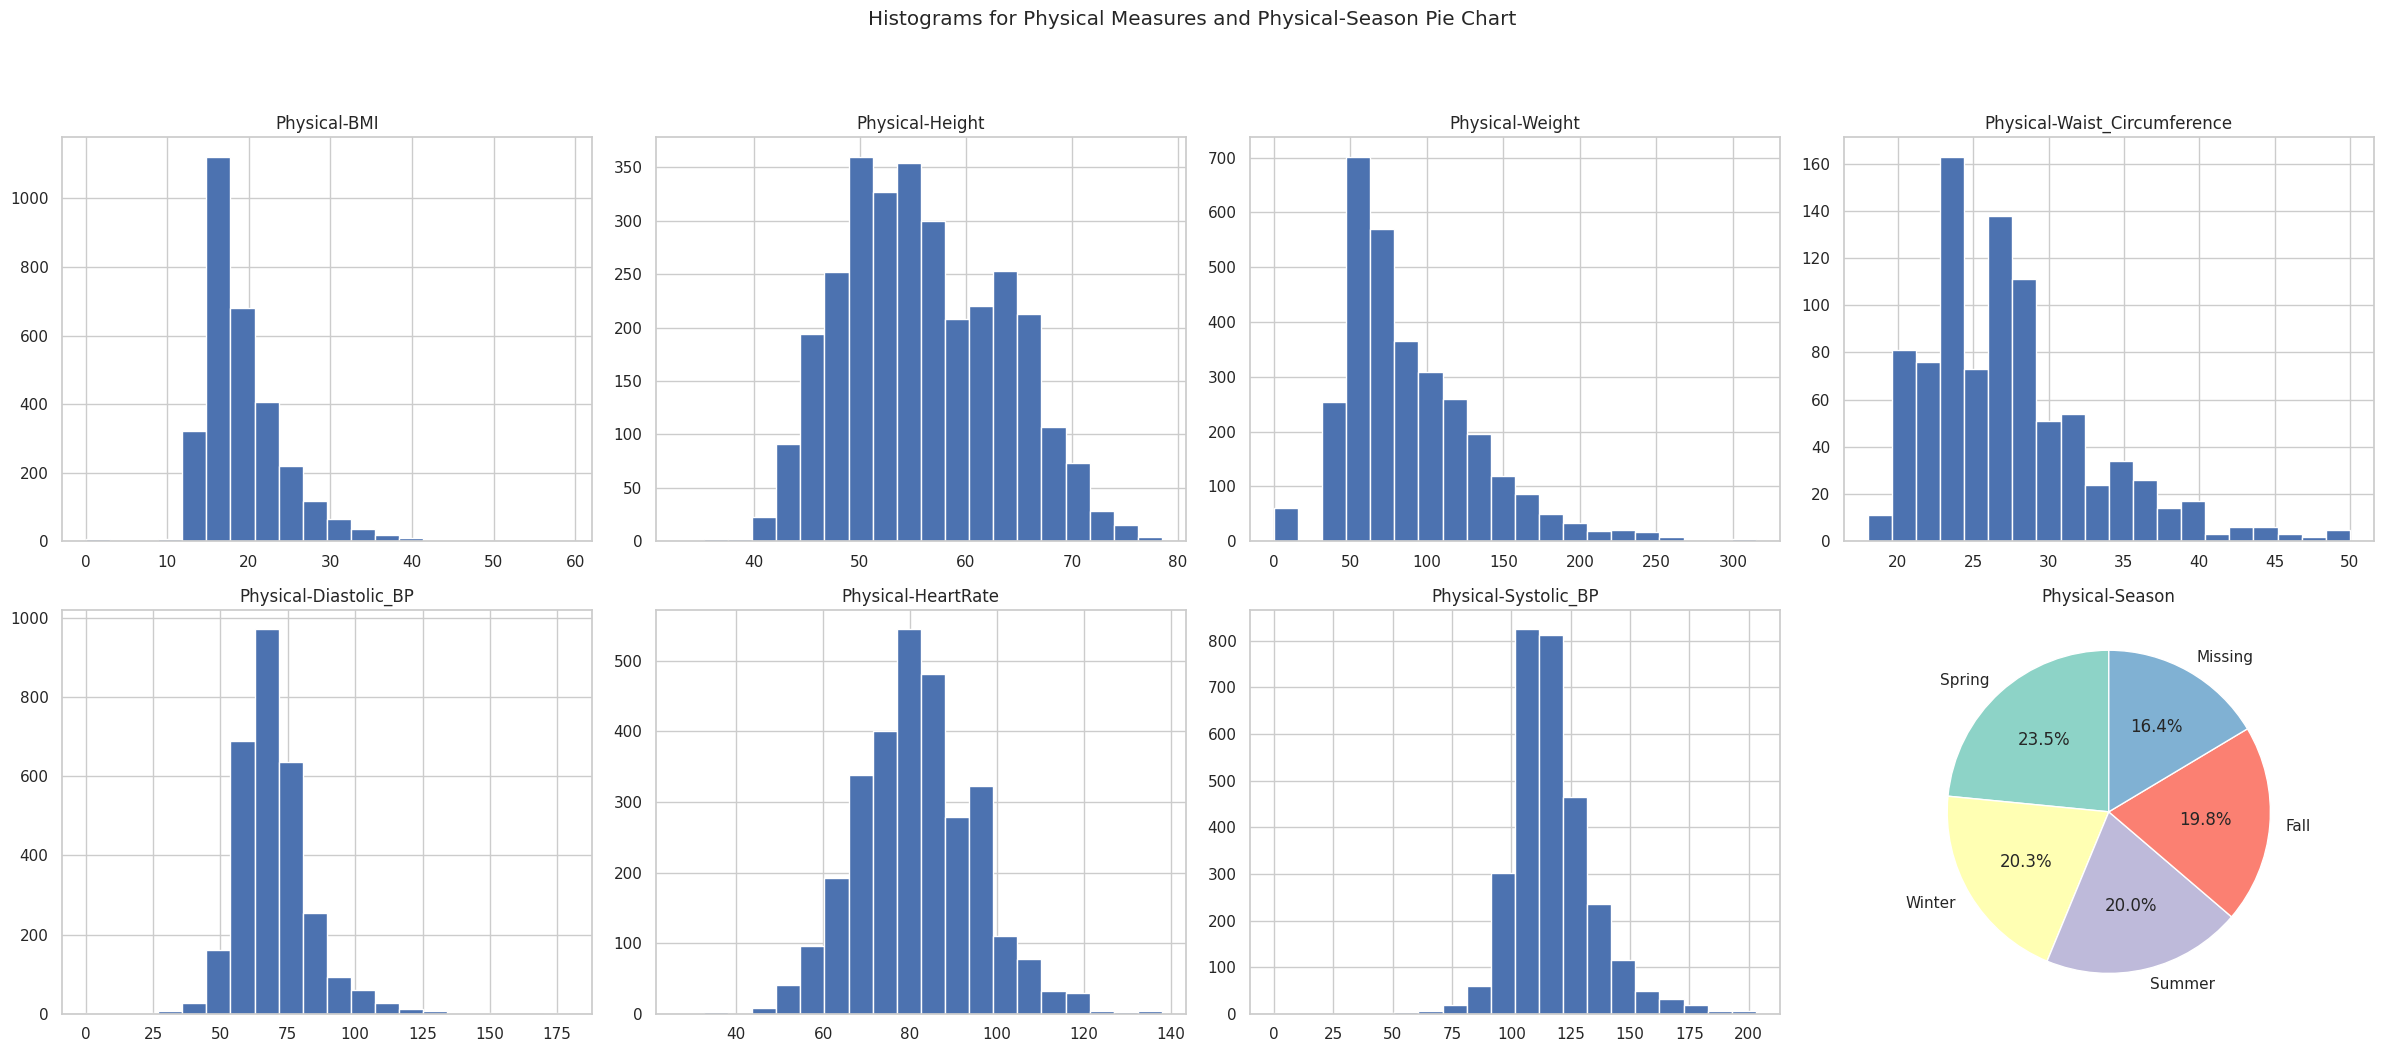

In [53]:
features_physical = groups.get('Physical Measures', [])
cols = [col for col in features_physical if col in continuous_cols]

plt.figure(figsize=(24, 10))
n_cols = 4
n_rows = len(cols) // n_cols + 1

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    train[col].hist(bins=20)
    plt.title(col)

plt.subplot(n_rows, n_cols, len(cols) + 1)
season_counts = train['Physical-Season'].value_counts(dropna=False)
plt.pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set3")
)
plt.title('Physical-Season')

plt.suptitle('Histograms for Physical Measures and Physical-Season Pie Chart', y=1.05)
plt.tight_layout()
plt.show()

In [54]:
calculate_stats(train, cols)

count        mean        std   min        25%  \
Physical-BMI                  3022.0   19.331929   5.113934   0.0   15.86935   
Physical-Height               3027.0   55.946713   7.473764  33.0   50.00000   
Physical-Weight               3076.0   89.038615  44.569040   0.0   57.20000   
Physical-Waist_Circumference   898.0   27.278508   5.567287  18.0   23.00000   
Physical-Diastolic_BP         2954.0   69.648951  13.611226   0.0   61.00000   
Physical-HeartRate            2967.0   81.597236  13.665196  27.0   72.00000   
Physical-Systolic_BP          2954.0  116.983074  17.061225   0.0  107.00000   

                                     50%         75%         max  missing  
Physical-BMI                   17.937682   21.571244   59.132048      938  
Physical-Height                55.000000   62.000000   78.500000      933  
Physical-Weight                77.000000  113.800000  315.000000      884  
Physical-Waist_Circumference   26.000000   30.000000   50.000000     3062  
Physical-Diastolic_BP          68.000000   76.000000  179.000000     1006  
Physical-HeartRate             81.000000   90.500000  138.000000      993  
Physical-Systolic_BP          114.000000  125.000000  203.000000     1006

In [55]:
wh_cols = [
    'Physical-BMI', 'Physical-Height',
    'Physical-Weight', 'Physical-Waist_Circumference'
]

(train[wh_cols] == 0).sum()

Physical-BMI                     7
Physical-Height                  0
Physical-Weight                 61
Physical-Waist_Circumference     0
dtype: int64

In [56]:
train[wh_cols] = train[wh_cols].replace(0, np.nan)
calculate_stats(train, wh_cols)

count       mean        std        min  \
Physical-BMI                  3015.0  19.376812   5.034191   8.522436   
Physical-Height               3027.0  55.946713   7.473764  33.000000   
Physical-Weight               3015.0  90.840060  43.161374  31.800000   
Physical-Waist_Circumference   898.0  27.278508   5.567287  18.000000   

                                    25%        50%         75%         max  \
Physical-BMI                  15.890526  17.950925   21.588631   59.132048   
Physical-Height               50.000000  55.000000   62.000000   78.500000   
Physical-Weight               58.200000  77.800000  114.300000  315.000000   
Physical-Waist_Circumference  23.000000  26.000000   30.000000   50.000000   

                              missing  
Physical-BMI                      945  
Physical-Height                   933  
Physical-Weight                   945  
Physical-Waist_Circumference     3062

In [57]:
# conversions
lbs_to_kg = 0.453592
inches_to_cm = 2.54

train['Physical-Weight'] = train['Physical-Weight'] * lbs_to_kg
train['Physical-Height'] = train['Physical-Height'] * inches_to_cm
train['Physical-Waist_Circumference'] = train['Physical-Waist_Circumference'] * inches_to_cm

# Recalculate BMI: BMI = weight (kg) / (height (m)^2)
train['Physical-BMI'] = np.where(
    train['Physical-Weight'].notna() & train['Physical-Height'].notna(),
    train['Physical-Weight'] / ((train['Physical-Height'] / 100) ** 2),
    np.nan  # If either is NaN, set BMI to NaN
)

calculate_stats(train, wh_cols)

count        mean        std        min  \
Physical-BMI                  3015.0   19.378674   5.034658   8.523273   
Physical-Height               3027.0  142.104651  18.983360  83.820000   
Physical-Weight               3015.0   41.204324  19.577654  14.424226   
Physical-Waist_Circumference   898.0   69.287410  14.140909  45.720000   

                                     25%         50%         75%         max  \
Physical-BMI                   15.892086   17.952687   21.590750   59.137852   
Physical-Height               127.000000  139.700000  157.480000  199.390000   
Physical-Weight                26.399054   35.289458   51.845566  142.881480   
Physical-Waist_Circumference   58.420000   66.040000   76.200000  127.000000   

                              missing  
Physical-BMI                      945  
Physical-Height                   933  
Physical-Weight                   945  
Physical-Waist_Circumference     3062

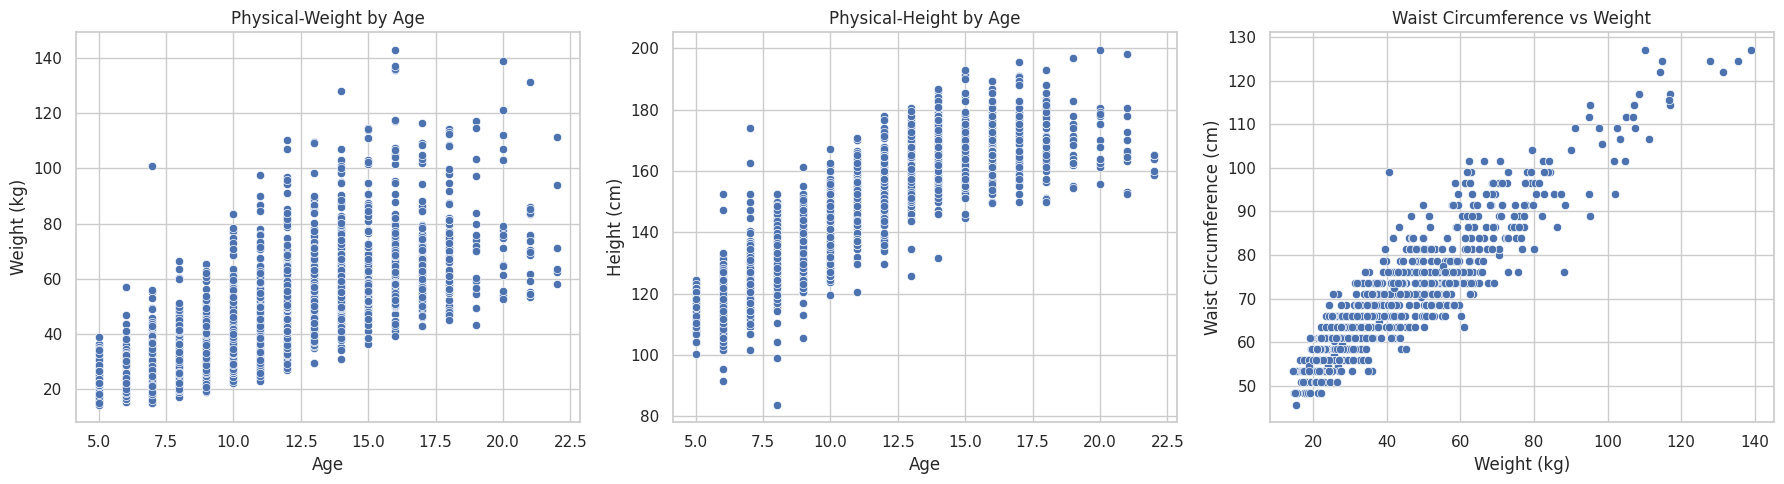

In [58]:
plt.figure(figsize=(18, 5))

# Physical-Weight by Age
plt.subplot(1, 3, 1)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Weight', data=train)
plt.title('Physical-Weight by Age')
plt.xlabel('Age')
plt.ylabel('Weight (kg)')

# Physical-Height by Age
plt.subplot(1, 3, 2)
sns.scatterplot(x='Basic_Demos-Age', y='Physical-Height', data=train)
plt.title('Physical-Height by Age')
plt.xlabel('Age')
plt.ylabel('Height (cm)')

# Physical-Waist_Circumference vs Physical-Weight
plt.subplot(1, 3, 3)
sns.scatterplot(x='Physical-Weight', y='Physical-Waist_Circumference', data=train)
plt.title('Waist Circumference vs Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Waist Circumference (cm)')

plt.tight_layout()
plt.show()

In [59]:
# Blood pressure and Heart rate
bp_hr_cols = [
    'Physical-Diastolic_BP', 'Physical-Systolic_BP',
    'Physical-HeartRate'
]
(train[bp_hr_cols] < 50).sum()

Physical-Diastolic_BP    88
Physical-Systolic_BP      2
Physical-HeartRate       12
dtype: int64

In [60]:
train[train['Physical-Systolic_BP'] <= train['Physical-Diastolic_BP']][bp_hr_cols]

Physical-Diastolic_BP  Physical-Systolic_BP  Physical-HeartRate
1140                  179.0                 139.0               103.0
1879                  117.0                 114.0               114.0
2386                   76.0                  76.0               116.0
3199                    0.0                   0.0                 NaN
3344                   98.0                  73.0                96.0

In [61]:
# We also know that systolic BP cannot be higher than diastolic BP
# These are certainly incorrect measurements. But again, we can't be sure which information is correct, 
# so we can either flag these rows for further manual inspection one by one, 
# or replace all suspicious values with NaN. 
# For this analysis I only remove 0 values and both BP if systolic is higher than diastolic.
train[cols] = train[cols].replace(0, np.nan)
train.loc[train['Physical-Systolic_BP'] <= train['Physical-Diastolic_BP'], bp_hr_cols] = np.nan

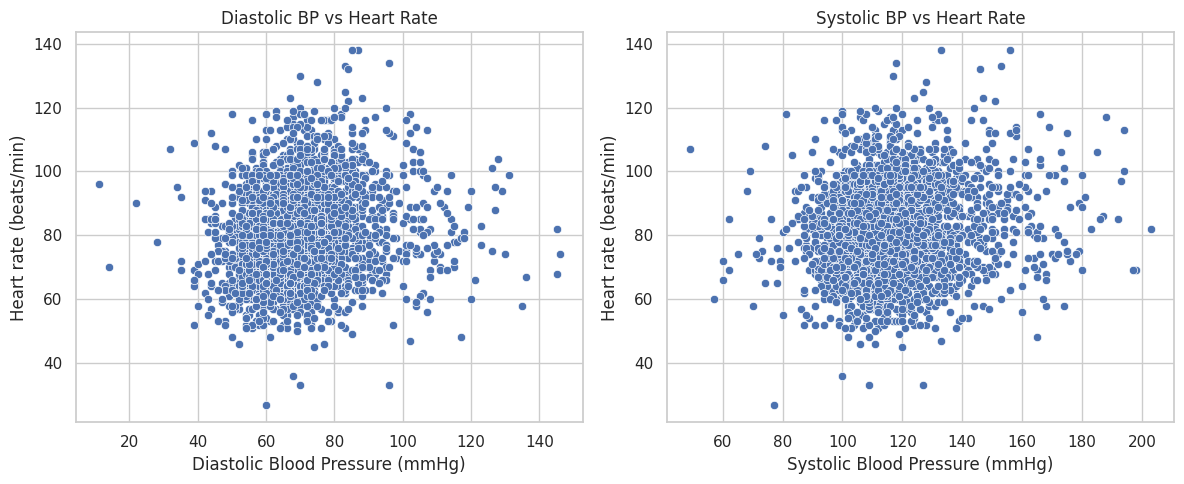

In [62]:
plt.figure(figsize=(12, 5))

# Diastolic BP vs Heart Rate
plt.subplot(1, 2, 1)
sns.scatterplot(x='Physical-Diastolic_BP', y='Physical-HeartRate', data=train)
plt.title('Diastolic BP vs Heart Rate')
plt.xlabel('Diastolic Blood Pressure (mmHg)')
plt.ylabel('Heart rate (beats/min)')

# Systolic BP vs Heart Rate
plt.subplot(1, 2, 2)
sns.scatterplot(x='Physical-Systolic_BP', y='Physical-HeartRate', data=train)
plt.title('Systolic BP vs Heart Rate')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Heart rate (beats/min)')

plt.tight_layout()
plt.show()

The absence of a clear direct correlation between heart rate and blood pressure in the plots suggests that the measurements were likely taken in a resting state or under non-stressful conditions.

Typically, systolic (SBP) and diastolic (DBP) blood pressure are positively correlated, as they both reflect the functioning of the cardiovascular system. However, there can be deviations:

Isolated Systolic Hypertension: High SBP with normal DBP
Isolated Diastolic Hypertension: Normal SBP with high DBP
General Hypertension: Both SBP and DBP are elevated
BMI is often used as an indicator of overall body fat and can correlate with blood pressure (e.g. higher BMI values indicating overweight or obesity are commonly associated with elevated blood pressure). Let's see if this is true for the study participants.

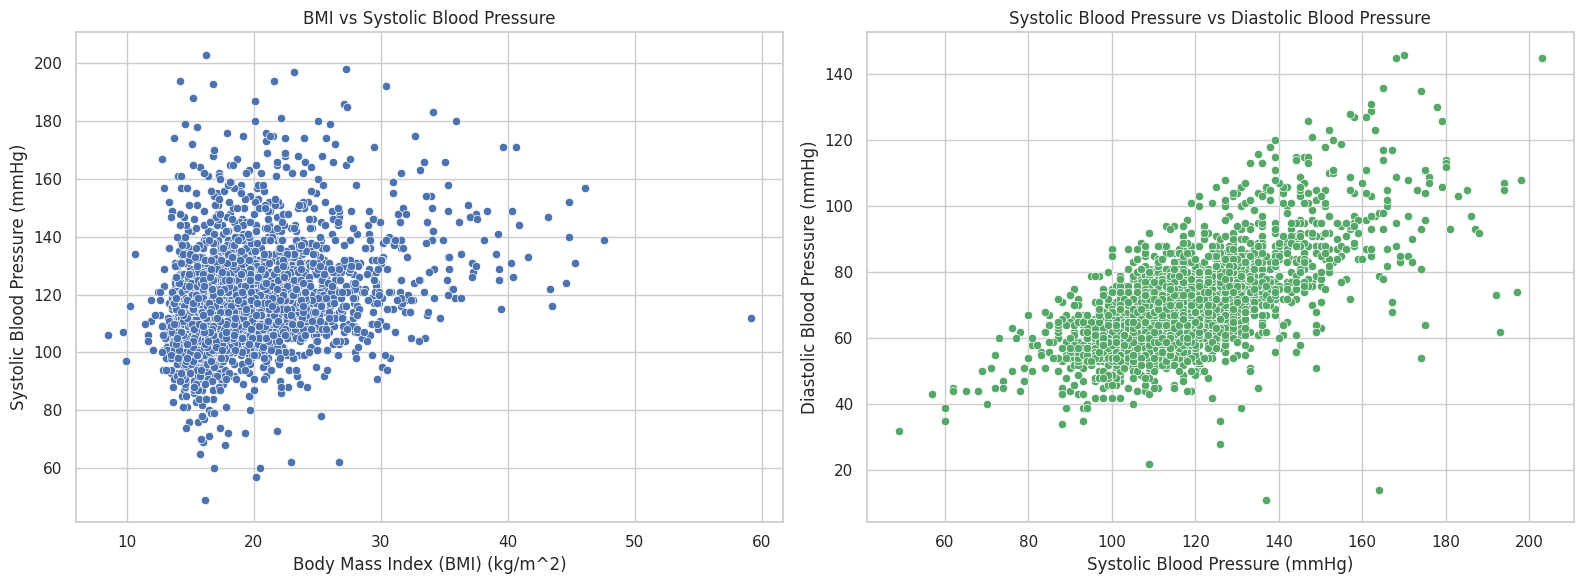

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BMI vs Systolic Blood Pressure
sns.scatterplot(x='Physical-BMI', y='Physical-Systolic_BP', data=train, ax=axes[0], color='b')
axes[0].set_title('BMI vs Systolic Blood Pressure')
axes[0].set_xlabel('Body Mass Index (BMI) (kg/m^2)')
axes[0].set_ylabel('Systolic Blood Pressure (mmHg)')

# Systolic Blood Pressure vs Diastolic Blood Pressure
sns.scatterplot(
    x='Physical-Systolic_BP', y='Physical-Diastolic_BP',
    data=train, ax=axes[1], color='g'
)
axes[1].set_title('Systolic Blood Pressure vs Diastolic Blood Pressure')
axes[1].set_xlabel('Systolic Blood Pressure (mmHg)')
axes[1].set_ylabel('Diastolic Blood Pressure (mmHg)')

plt.tight_layout()
plt.show()

There does not appear to be a strong, clear correlation between body mass index (BMI) and systolic blood pressure (BP).
As expected, there is a strong positive correlation between systolic and diastolic BP, but there are notable cases of isolated systolic or diastolic hypertension (or errors in the data, who knows?)

Now we'll define approximate normal ranges for each column and count the number of rows that fall outside these ranges. As normal values can vary widely between the ages of 5 and 22, I use values that are general estimates; for more precise results you can refer to BMI-for-age growth charts on the CDC or WHO websites, for example.

In [64]:
normal_ranges = {
    'Physical-BMI': (18.5, 24.9),
    'Physical-Height': (100, 193),
    'Physical-Weight': (20, 120),
    'Physical-Waist_Circumference': (50, 90),
    'Physical-Diastolic_BP': (60, 80),
    'Physical-HeartRate': (60, 100),
    'Physical-Systolic_BP': (90, 120)
}

def count_out_of_range(data, column, low, high):
    return ((data[column] < low) | (data[column] > high)).sum()

In [66]:
out_of_range_counts = {
    col: count_out_of_range(train, col, *normal_ranges[col])
    for col in normal_ranges
}
print("Number of rows with values outside normal ranges:")

for col, count in out_of_range_counts.items():
    total_valid = train[col].notna().sum()
    percentage = (count / total_valid) * 100
    print(f"{col}: {count} ({percentage:.2f}%)")

Number of rows with values outside normal ranges:
Physical-BMI: 2027 (67.23%)
Physical-Height: 10 (0.33%)
Physical-Weight: 165 (5.47%)
Physical-Waist_Circumference: 93 (10.36%)
Physical-Diastolic_BP: 1019 (34.55%)
Physical-HeartRate: 347 (11.71%)
Physical-Systolic_BP: 1075 (36.45%)


Group BMI by obesity level according to WHO BMI-for-age (5-19 years)

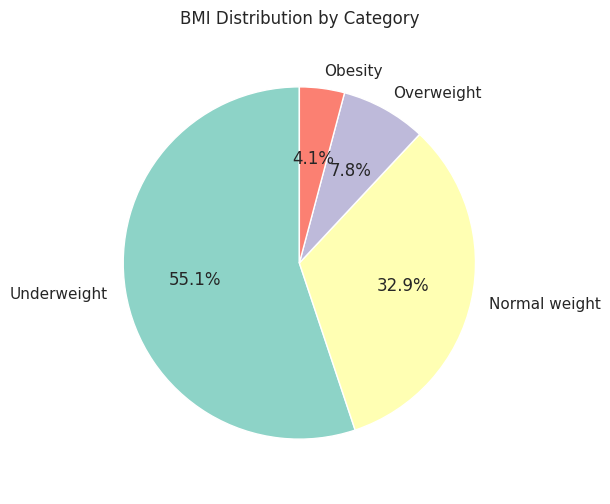

In [67]:
bmi_categories = [
    ('Underweight', train['Physical-BMI'] < 18.5),
    ('Normal weight', (train['Physical-BMI'] >= 18.5) & (train['Physical-BMI'] <= 24.9)),
    ('Overweight', (train['Physical-BMI'] >= 25) & (train['Physical-BMI'] <= 29.9)),
    ('Obesity', train['Physical-BMI'] >= 30)
]
bmi_category_counts = {label: condition.sum() for label, condition in bmi_categories}

plt.figure(figsize=(5, 6))
plt.pie(bmi_category_counts.values(),
        labels=bmi_category_counts.keys(),
        autopct='%1.1f%%', startangle=90,
        colors=plt.cm.Set3.colors)
plt.title('BMI Distribution by Category')
plt.axis('equal')
plt.show()

In [68]:
train[train['Physical-BMI'] < 12][cols + ['Basic_Demos-Age']].sort_values(by = 'Physical-BMI')

Physical-BMI  Physical-Height  Physical-Weight  \
2848      8.523273          149.860        19.141582   
1952      9.694718          149.860        21.772416   
3463      9.960144          152.400        23.133192   
3324     10.282698          147.320        22.316726   
1707     10.676487          162.560        28.213422   
3143     11.468414          131.318        19.776611   
1700     11.676989          167.005        32.567906   
3636     11.713943          139.700        22.861037   
1307     11.750716          112.522        14.877818   
156      11.916424          149.860        26.761928   
2023     11.926324          161.290        31.025693   

      Physical-Waist_Circumference  Physical-Diastolic_BP  Physical-HeartRate  \
2848                           NaN                   68.0                77.0   
1952                           NaN                   64.0                86.0   
3463                           NaN                   48.0                73.0   
3324                           NaN                   72.0                72.0   
1707                           NaN                   99.0                90.0   
3143                           NaN                   59.0                77.0   
1700                           NaN                   50.0                90.0   
3636                           NaN                   58.0                99.0   
1307                         48.26                    NaN                77.0   
156                          71.12                   76.0                83.0   
2023                           NaN                   59.0                65.0   

      Physical-Systolic_BP  Basic_Demos-Age  
2848                 106.0                8  
1952                 107.0                7  
3463                  97.0                6  
3324                 116.0                6  
1707                 134.0                7  
3143                 110.0                8  
1700                 106.0               10  
3636                 104.0                7  
1307                   NaN                7  
156                  118.0               11  
2023                 111.0                9

In [69]:
train[train['Physical-Systolic_BP'] > 160][cols + ['Basic_Demos-Age']].sort_values(by = 'Physical-Systolic_BP')

Physical-BMI  Physical-Height  Physical-Weight  \
1794     14.036968          121.920        20.865232   
284      21.719865          152.527        50.530149   
3032     14.272220          129.540        23.949658   
2401     17.245599          129.540        28.939170   
882      16.398111          124.460        25.401152   
...            ...              ...              ...   
1019     14.172653          124.460        21.953853   
2777     21.625191          134.620        39.190349   
2549     23.154916          169.926        66.859461   
436      27.260353          175.260        83.733083   
3471     16.250635          137.160        30.572101   

      Physical-Waist_Circumference  Physical-Diastolic_BP  Physical-HeartRate  \
1794                           NaN                  111.0                69.0   
284                            NaN                   96.0                99.0   
3032                           NaN                  104.0                89.0   
2401                           NaN                   87.0               103.0   
882                            NaN                  127.0                95.0   
...                            ...                    ...                 ...   
1019                         60.96                  107.0               113.0   
2777                           NaN                  105.0               100.0   
2549                           NaN                   74.0                69.0   
436                            NaN                  108.0                69.0   
3471                           NaN                  145.0                82.0   

      Physical-Systolic_BP  Basic_Demos-Age  
1794                 161.0                8  
284                  161.0               12  
3032                 161.0                9  
2401                 161.0                8  
882                  161.0                6  
...                    ...              ...  
1019                 194.0                8  
2777                 194.0                7  
2549                 197.0               17  
436                  198.0               19  
3471                 203.0                9  

[73 rows x 8 columns]

A significant number of participants, especially for BMI and blood pressure, fall outside the expected normal ranges
Most participants' heights and weights are within reasonable ranges, but many have BMIs outside the approximate normal range, suggesting that many participants may have disproportionate body proportions (or incorrect measurements?). For a more accurate understanding, age-specific reference values need to be used.

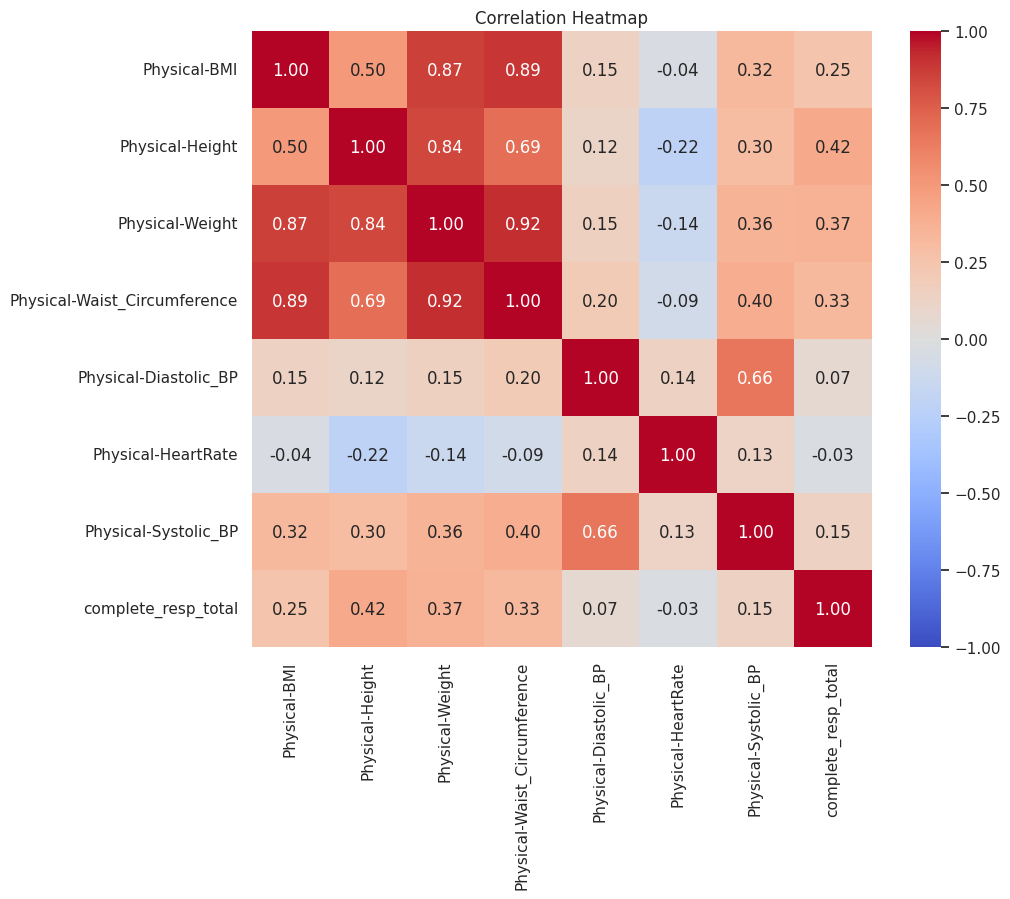

In [70]:
data_subset = train[cols + ['complete_resp_total']]

corr_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

The positive correlation with the target is for height, weight, and waist circumference, which means that taller and fatter people tend to have a higher SII. But as these physical parameters increase with age, and we already know that SII tends to be highest in adolescents, this could indicate that they acts as a proxy for age (likely reflect age-related trends).
Cardiovascular measures (systolic blood pressure, diastolic blood pressure and heart rate) also change with age, but do not vary as drastically between childhood and adolescence as physical measures, and may not be as sensitive to behaviours such as internet use. They also have a higher degree of variability, as we saw in the graphs above, so the weak correlation may indicate that cardiovascular health is not strongly linked to PIU, or that these data are just more scattered and noisy and the relationship with PIU is diluted.

In [72]:
data_dict[data_dict['Instrument'] == 'Bio-electric Impedance Analysis']

Instrument                       Field  \
33  Bio-electric Impedance Analysis                  BIA-Season   
34  Bio-electric Impedance Analysis  BIA-BIA_Activity_Level_num   
35  Bio-electric Impedance Analysis                 BIA-BIA_BMC   
36  Bio-electric Impedance Analysis                 BIA-BIA_BMI   
37  Bio-electric Impedance Analysis                 BIA-BIA_BMR   
38  Bio-electric Impedance Analysis                 BIA-BIA_DEE   
39  Bio-electric Impedance Analysis                 BIA-BIA_ECW   
40  Bio-electric Impedance Analysis                 BIA-BIA_FFM   
41  Bio-electric Impedance Analysis                BIA-BIA_FFMI   
42  Bio-electric Impedance Analysis                 BIA-BIA_FMI   
43  Bio-electric Impedance Analysis                 BIA-BIA_Fat   
44  Bio-electric Impedance Analysis           BIA-BIA_Frame_num   
45  Bio-electric Impedance Analysis                 BIA-BIA_ICW   
46  Bio-electric Impedance Analysis                 BIA-BIA_LDM   
47  Bio-electric Impedance Analysis                 BIA-BIA_LST   
48  Bio-electric Impedance Analysis                 BIA-BIA_SMM   
49  Bio-electric Impedance Analysis                 BIA-BIA_TBW   

                 Description             Type                        Values  \
33   Season of participation              str  Spring, Summer, Fall, Winter   
34            Activity Level  categorical int                     1,2,3,4,5   
35      Bone Mineral Content            float                           NaN   
36           Body Mass Index            float                           NaN   
37      Basal Metabolic Rate            float                           NaN   
38  Daily Energy Expenditure            float                           NaN   
39       Extracellular Water            float                           NaN   
40             Fat Free Mass            float                           NaN   
41       Fat Free Mass Index            float                           NaN   
42            Fat Mass Index            float                           NaN   
43       Body Fat Percentage            float                           NaN   
44                Body Frame  categorical int                         1,2,3   
45       Intracellular Water            float                           NaN   
46             Lean Dry Mass            float                           NaN   
47          Lean Soft Tissue            float                           NaN   
48      Skeletal Muscle Mass            float                           NaN   
49          Total Body Water            float                           NaN   

                                         Value Labels  
33                                                NaN  
34  1=Very Light, 2=Light, 3=Moderate, 4=Heavy, 5=...  
35                                                NaN  
36                                                NaN  
37                                                NaN  
38                                                NaN  
39                                                NaN  
40                                                NaN  
41                                                NaN  
42                                                NaN  
43                                                NaN  
44                         1=Small, 2=Medium, 3=Large  
45                                                NaN  
46                                                NaN  
47                                                NaN  
48                                                NaN  
49                                                NaN

There is no information in the competition description about what equipment was used, is this raw data or did they use some BIA equation models to estimate the parameters. But it's likely that the BIA data has already been processed using a BIA equation model. It is very important to note that BIA is not a precise method, for example it tends to overestimate muscle mass, so equations have been developed to estimate muscle mass based on factors such as age, sex, height, weight and resistance and/or reactance estimated by BIA... a large number of prediction equation models have been generated through various validation studies (link30478-4/fulltext)). It is essential that all recordings are processed with the same equation, but we cannot be sure.

In [73]:
bia_data_dict = data_dict[data_dict['Instrument'] == 'Bio-electric Impedance Analysis']
categorical_columns = bia_data_dict[bia_data_dict['Type'] == 'categorical int']['Field'].tolist()
continuous_columns = bia_data_dict[bia_data_dict['Type'] == 'float']['Field'].tolist()

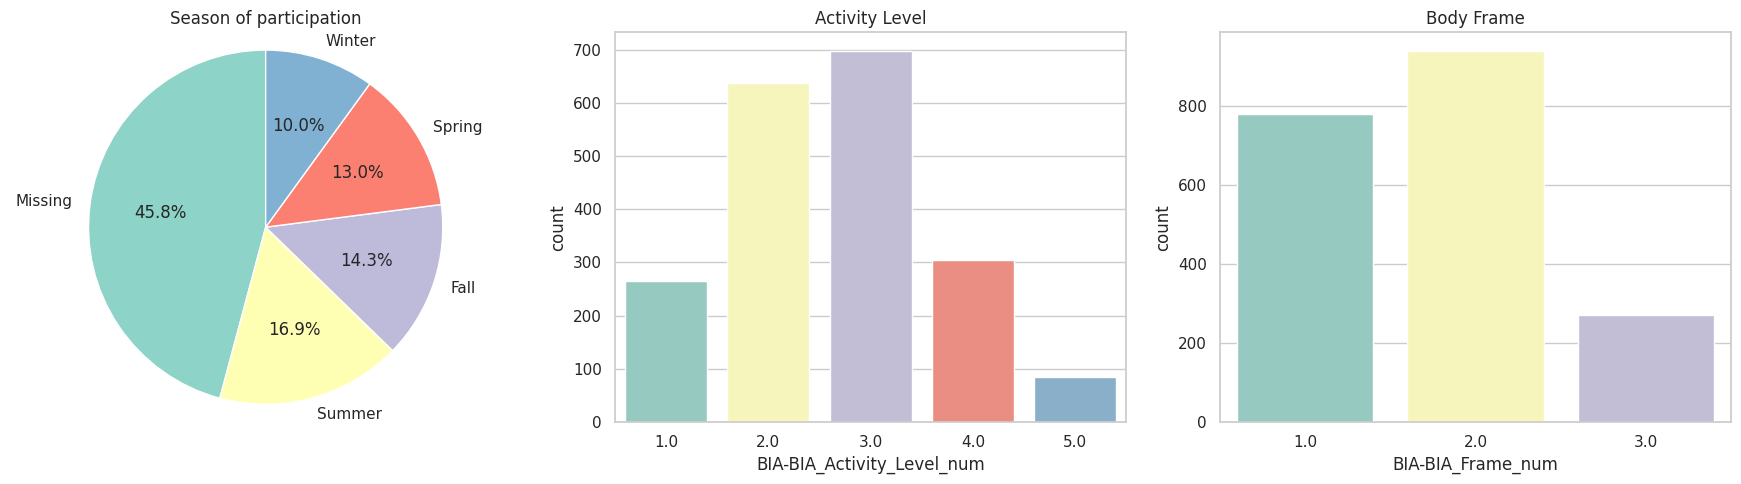

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Season
season_counts = train['BIA-Season'].value_counts(normalize=True)
axes[0].pie(
    season_counts, 
    labels=season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
axes[0].set_title(
    f"{bia_data_dict[bia_data_dict['Field'] == 'BIA-Season']['Description'].values[0]}"
)
axes[0].axis('equal')

# Other categorical columns
for idx, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=train, palette="Set3", ax=axes[idx+1])
    axes[idx+1].set_title(data_dict[data_dict['Field'] == col]['Description'].values[0])

plt.tight_layout()
plt.show()

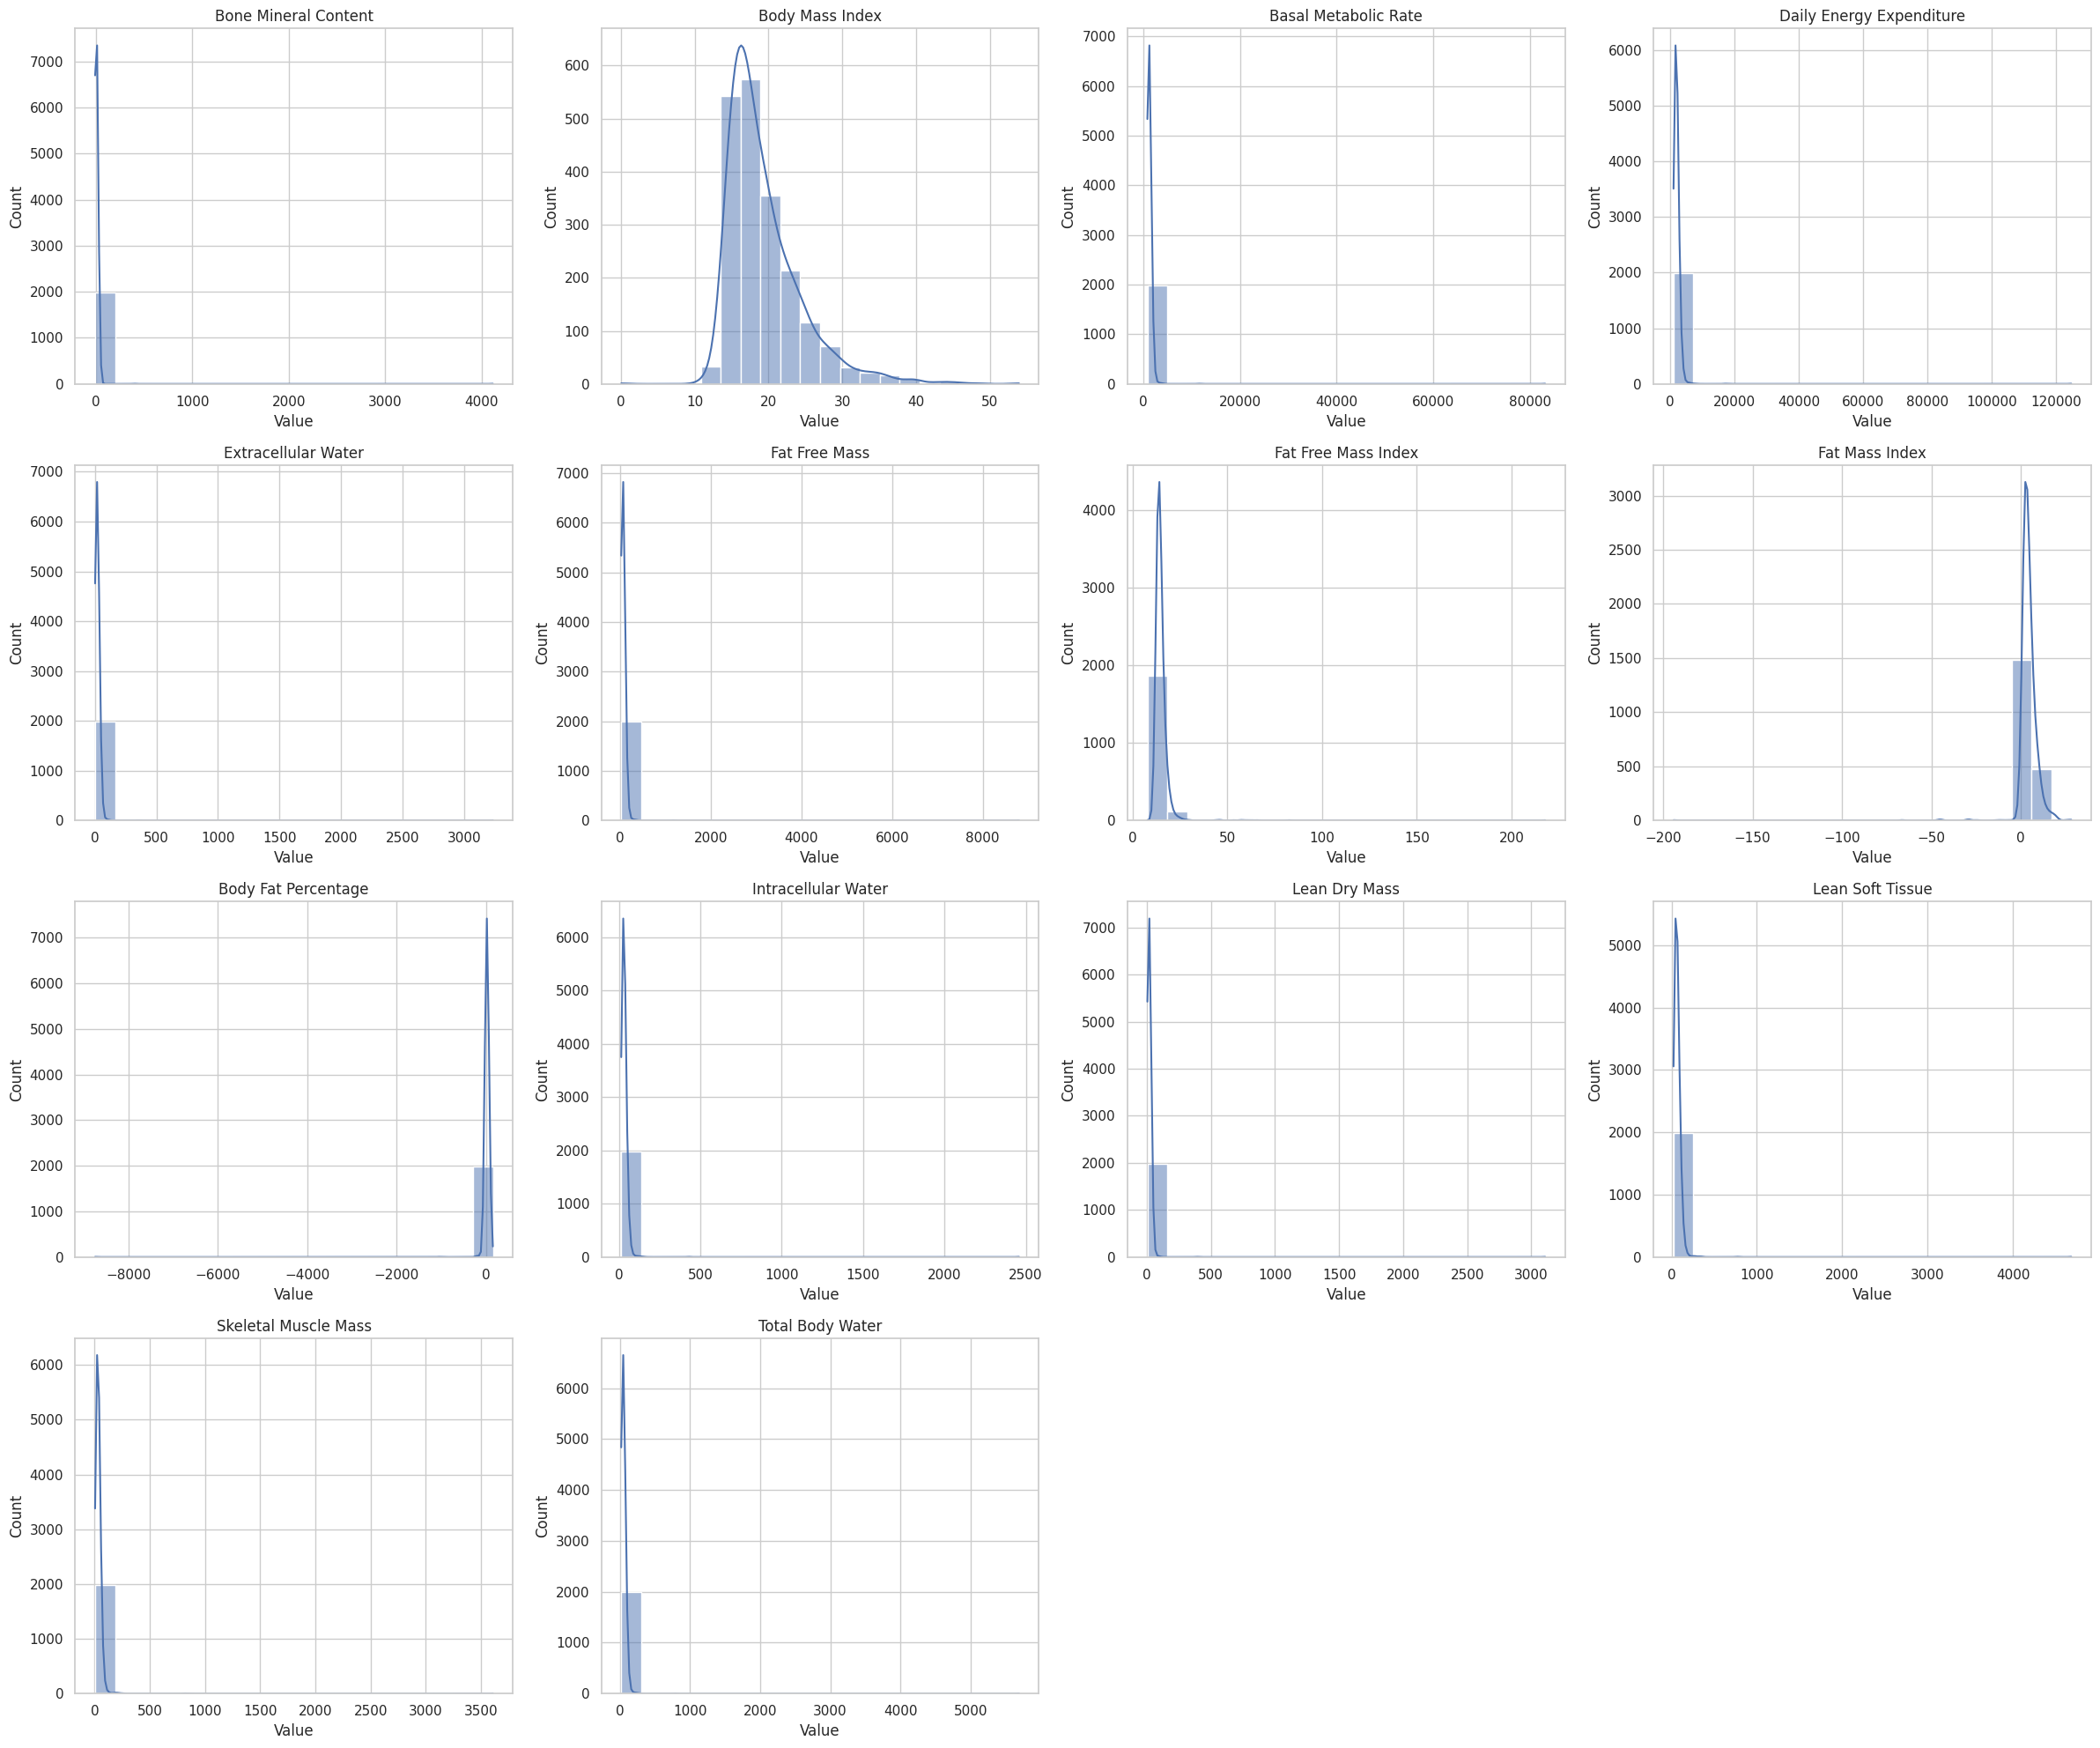

In [75]:
plt.figure(figsize=(24, 20))

for idx, col in enumerate(continuous_columns):
    plt.subplot(4, 4, idx + 1)
    sns.histplot(train[col].dropna(), bins=20, kde=True)
    plt.title(data_dict[data_dict['Field'] == col]['Description'].values[0])
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [76]:
calculate_stats(train, continuous_columns)

count         mean          std          min          25%  \
BIA-BIA_BMC   1991.0     6.719826    92.586325    -7.789610     2.966905   
BIA-BIA_BMI   1991.0    19.367048     5.047848     0.048267    15.913600   
BIA-BIA_BMR   1991.0  1237.018187  1872.383246   813.397000  1004.710000   
BIA-BIA_DEE   1991.0  2064.693747  2836.246272  1073.450000  1605.785000   
BIA-BIA_ECW   1991.0    20.825346    73.266287     1.789450    11.109550   
BIA-BIA_FFM   1991.0    74.021708   199.433753    28.900400    49.278100   
BIA-BIA_FFMI  1991.0    15.030554     5.792505     7.864850    13.408000   
BIA-BIA_FMI   1991.0     4.336495     6.356402  -194.163000     2.306915   
BIA-BIA_Fat   1991.0    16.855020   199.372119 -8745.080000     8.602395   
BIA-BIA_ICW   1991.0    33.173380    56.272346    14.489000    24.463500   
BIA-BIA_LDM   1991.0    20.022990    70.215610     4.635810    12.983150   
BIA-BIA_LST   1991.0    67.301883   108.705918    23.620100    45.204100   
BIA-BIA_SMM   1991.0    34.389466    84.050607     4.655730    21.141550   
BIA-BIA_TBW   1991.0    53.998726   129.362539    20.589200    35.887000   

                     50%          75%          max  missing  
BIA-BIA_BMC      3.92272     5.460925    4115.3600     1969  
BIA-BIA_BMI     17.96650    21.461100      53.9243     1969  
BIA-BIA_BMR   1115.38000  1310.360000   83152.2000     1969  
BIA-BIA_DEE   1863.98000  2218.145000  124728.0000     1969  
BIA-BIA_ECW     15.92800    25.162200    3233.0000     1969  
BIA-BIA_FFM     61.06620    81.833800    8799.0800     1969  
BIA-BIA_FFMI    14.09250    15.430950     217.7710     1969  
BIA-BIA_FMI      3.69863     5.987690      28.2515     1969  
BIA-BIA_Fat     16.17460    30.273100     153.8200     1969  
BIA-BIA_ICW     28.85580    35.475700    2457.9100     1969  
BIA-BIA_LDM     16.43880    22.167600    3108.1700     1969  
BIA-BIA_LST     56.99640    77.105650    4683.7100     1969  
BIA-BIA_SMM     27.41510    38.179400    3607.6900     1969  
BIA-BIA_TBW     44.98700    60.271050    5690.9100     1969

The distribution of the various bioelectrical impedance analysis measurements in the data set indicates that most of them are not useful: highly skewed, with the majority of participants having marginal values and a few outliers (potential measurement errors).
Some variables, such as Fat Mass Index and Body Fat Percentage, show implausible negative values, and almost all - extreme high values, indicating potential data quality issues

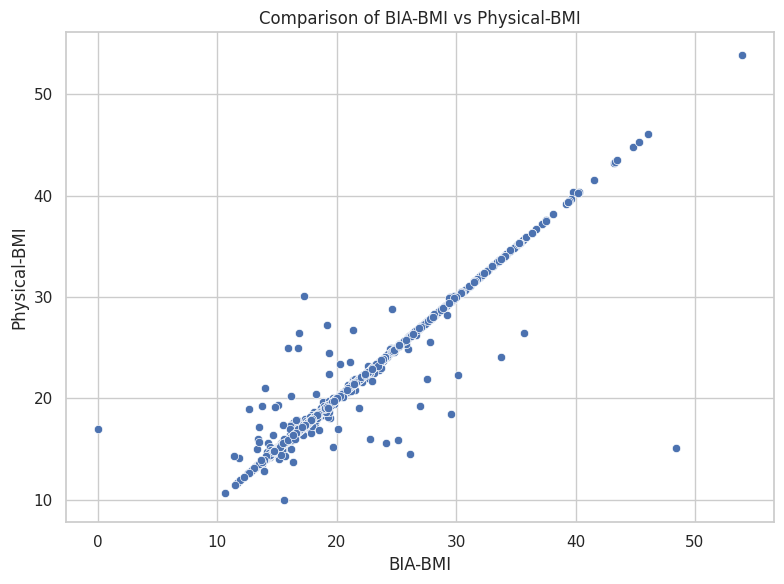

In [77]:
# Compare the two measured BMI

bmi_data = train[['BIA-BIA_BMI', 'Physical-BMI']].dropna()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='BIA-BIA_BMI', y='Physical-BMI',
    data=bmi_data,
    color='b'
)
plt.title('Comparison of BIA-BMI vs Physical-BMI')
plt.xlabel('BIA-BMI')
plt.ylabel('Physical-BMI')

plt.tight_layout()
plt.show()

In [78]:
bmi_measures = train[['BIA-Season', 'Physical-Season']].dropna()
bmi_measures.groupby(['BIA-Season', 'Physical-Season']).size().reset_index(name='Count')

BIA-Season Physical-Season  Count
0        Fall            Fall    407
1        Fall         Missing      6
2        Fall          Spring     15
3        Fall          Summer    131
4        Fall          Winter      8
5     Missing            Fall    294
6     Missing         Missing    635
7     Missing          Spring    309
8     Missing          Summer    277
9     Missing          Winter    300
10     Spring            Fall      3
11     Spring         Missing      4
12     Spring          Spring    414
13     Spring          Summer      6
14     Spring          Winter     86
15     Summer            Fall     37
16     Summer         Missing      4
17     Summer          Spring    185
18     Summer          Summer    367
19     Summer          Winter     76
20     Winter            Fall     45
21     Winter         Missing      1
22     Winter          Spring      6
23     Winter          Summer     10
24     Winter          Winter    334

This may not be exactly correct, because above I found zeros in the physical measurements and recalculated the BMI... As we can see, this BMI measured during the bioelectrical impedance also contains zeros that I cannot explain and that seem to be errors.

I am afraid that it will be meaningless to examine the relationships with the target variable, as there is too much unknown about these data (how they were collected and processed, what the reference values are, etc.).

In [79]:
# FitnessGram Vitals and Treadmill
groups.get('FitnessGram Vitals and Treadmill', [])

['Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec']

In [80]:
data = train[train['Fitness_Endurance-Max_Stage'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with Fitness_Endurance-Max_Stage data:"
    f" {age_range.min()} - {age_range.max()} years")

Age range for participants with Fitness_Endurance-Max_Stage data: 6 - 12 years


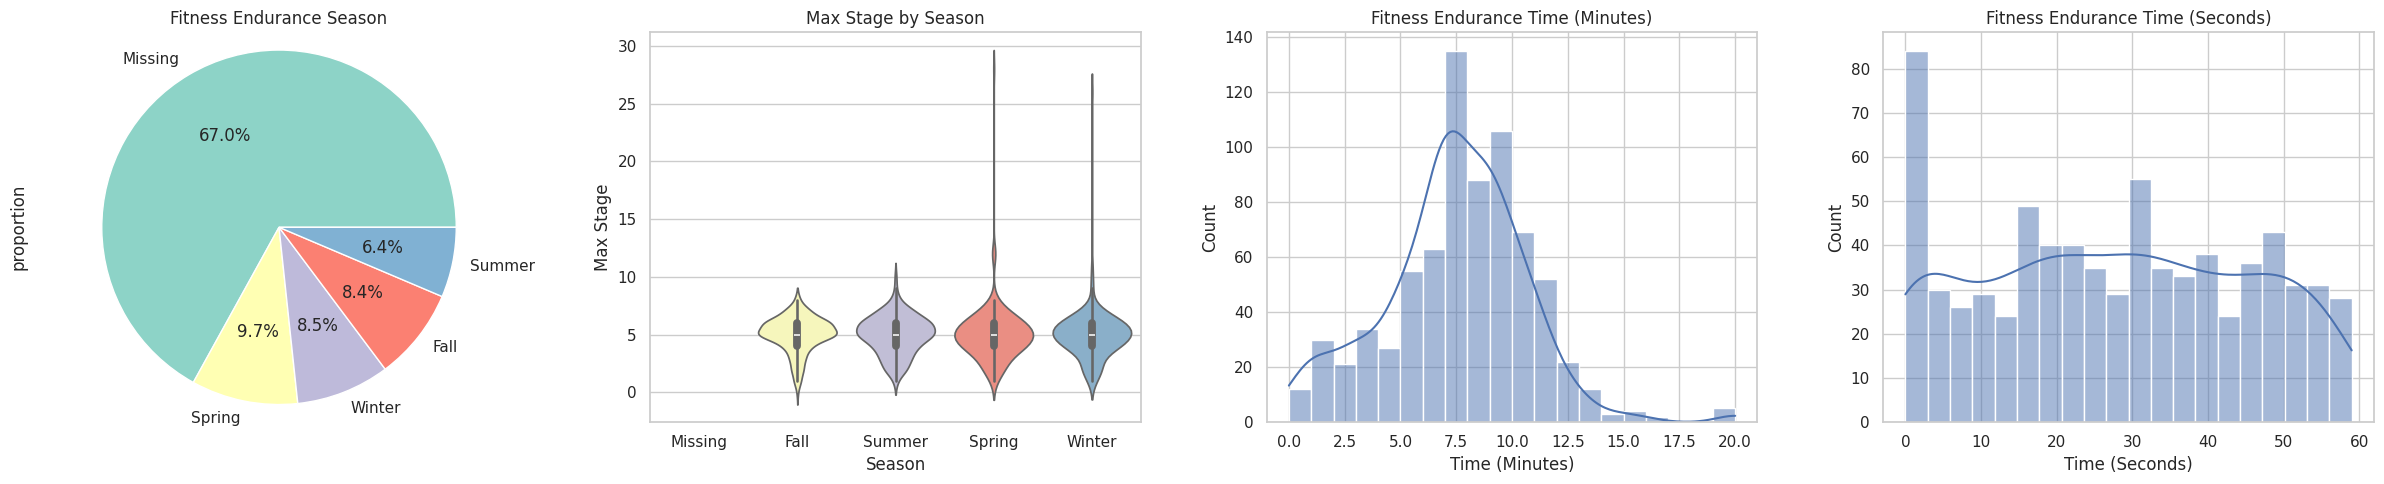

In [81]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Fitness Endurance Season
train['Fitness_Endurance-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors, ax=axes[0]
)
axes[0].set_title('Fitness Endurance Season')
axes[0].axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Box plot for Max Stage by Season
sns.violinplot(
    x='Fitness_Endurance-Season',
    y='Fitness_Endurance-Max_Stage',
    data=train, palette="Set3",
    ax=axes[1]
)
axes[1].set_title('Max Stage by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Max Stage')

# Fitness Endurance Time (Minutes)
sns.histplot(train['Fitness_Endurance-Time_Mins'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Fitness Endurance Time (Minutes)')
axes[2].set_xlabel('Time (Minutes)')

# Fitness Endurance Time (Seconds)
sns.histplot(train['Fitness_Endurance-Time_Sec'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Fitness Endurance Time (Seconds)')
axes[3].set_xlabel('Time (Seconds)')

plt.tight_layout()
plt.show()

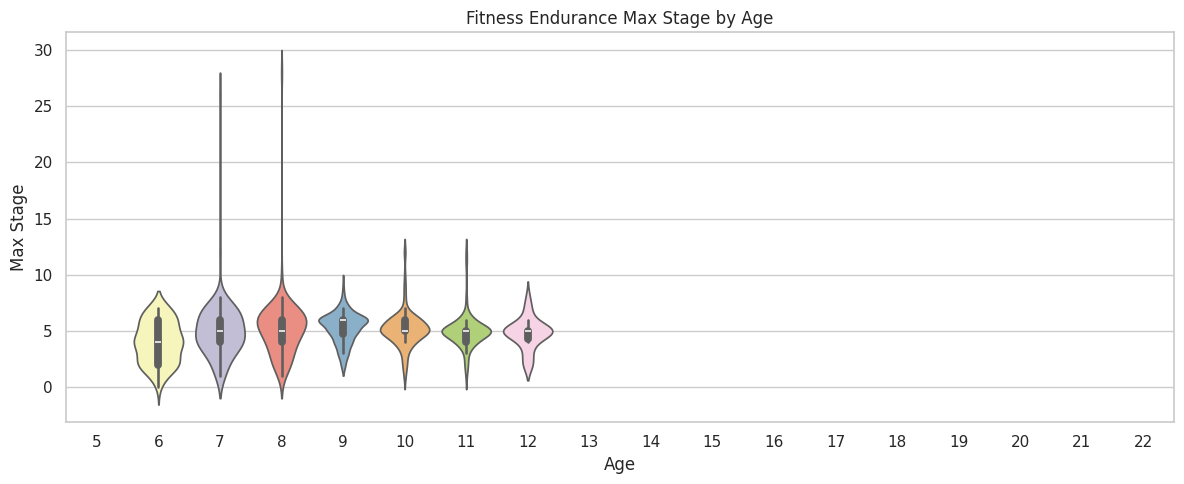

In [82]:
plt.figure(figsize=(12, 5))

sns.violinplot(x='Basic_Demos-Age', y='Fitness_Endurance-Max_Stage', data=train, palette="Set3")
plt.title('Fitness Endurance Max Stage by Age')
plt.xlabel('Age')
plt.ylabel('Max Stage')

plt.tight_layout()
plt.show()

In [83]:
cols = [
    'Fitness_Endurance-Max_Stage',
    'Fitness_Endurance-Time_Mins',
    'Fitness_Endurance-Time_Sec'
]
calculate_stats(train, cols)

count       mean        std  min    25%   50%  \
Fitness_Endurance-Max_Stage  743.0   4.989233   2.014072  0.0   4.00   5.0   
Fitness_Endurance-Time_Mins  740.0   7.370270   3.189662  0.0   6.00   7.0   
Fitness_Endurance-Time_Sec   740.0  27.581081  17.707751  0.0  12.75  28.0   

                              75%   max  missing  
Fitness_Endurance-Max_Stage   6.0  28.0     3217  
Fitness_Endurance-Time_Mins   9.0  20.0     3220  
Fitness_Endurance-Time_Sec   43.0  59.0     3220

In [84]:
train[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | 
     train['Fitness_Endurance-Time_Sec'].isna())
][cols]

Fitness_Endurance-Max_Stage  Fitness_Endurance-Time_Mins  \
420                           4.0                          6.0   
1470                         26.0                          NaN   
2907                          1.0                          NaN   
3666                          2.0                          NaN   

      Fitness_Endurance-Time_Sec  
420                          NaN  
1470                         NaN  
2907                        26.0  
3666                         NaN

It's possible that during data entry minutes or seconds were left blank (entered as NaN) when they should have been recorded as 0 minutes/seconds. While the missing seconds are not as important, the missing minutes may actually be missing and treating them as 0 would give an incorrect test result. I think it's better to just remove these suspicious cases 

In [85]:
train.loc[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | 
     train['Fitness_Endurance-Time_Sec'].isna()), cols
] = np.nan

train['Fitness_Endurance-Total_Time_Sec'] = train[
    'Fitness_Endurance-Time_Mins'
] * 60 + train['Fitness_Endurance-Time_Sec']

calculate_stats(train, ['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec'])

count        mean         std  min    25%  \
Fitness_Endurance-Max_Stage       739.0    4.971583    1.856069  0.0    4.0   
Fitness_Endurance-Total_Time_Sec  739.0  469.910690  188.716073  5.0  362.0   

                                    50%    75%     max  missing  
Fitness_Endurance-Max_Stage         5.0    6.0    28.0     3221  
Fitness_Endurance-Total_Time_Sec  476.0  590.5  1200.0     3221

On average, participants reached stage 5 in the endurance test.
Some participants failed to complete the first stage (min = 0), or these are errors in data again.
There is a small number of participants with exceptionally high endurance of age 7-8 years.
There is a substantial amount of missing data (over 80% of the dataset lacks this information). 

In [86]:
# FitnessGram Child
data_dict[data_dict['Instrument'] == 'FitnessGram Child']

Instrument              Field  \
18  FitnessGram Child         FGC-Season   
19  FitnessGram Child         FGC-FGC_CU   
20  FitnessGram Child    FGC-FGC_CU_Zone   
21  FitnessGram Child       FGC-FGC_GSND   
22  FitnessGram Child  FGC-FGC_GSND_Zone   
23  FitnessGram Child        FGC-FGC_GSD   
24  FitnessGram Child   FGC-FGC_GSD_Zone   
25  FitnessGram Child         FGC-FGC_PU   
26  FitnessGram Child    FGC-FGC_PU_Zone   
27  FitnessGram Child        FGC-FGC_SRL   
28  FitnessGram Child   FGC-FGC_SRL_Zone   
29  FitnessGram Child        FGC-FGC_SRR   
30  FitnessGram Child   FGC-FGC_SRR_Zone   
31  FitnessGram Child         FGC-FGC_TL   
32  FitnessGram Child    FGC-FGC_TL_Zone   

                                  Description             Type  \
18                    Season of participation              str   
19                              Curl up total              int   
20                       Curl up fitness zone  categorical int   
21         Grip Strength total (non-dominant)            float   
22  Grip Strength fitness zone (non-dominant)  categorical int   
23             Grip Strength total (dominant)            float   
24      Grip Strength fitness zone (dominant)  categorical int   
25                              Push-up total              int   
26                       Push-up fitness zone  categorical int   
27              Sit & Reach total (left side)            float   
28       Sit & Reach fitness zone (left side)  categorical int   
29             Sit & Reach total (right side)            float   
30      Sit & Reach fitness zone (right side)  categorical int   
31                           Trunk lift total              int   
32                    Trunk lift fitness zone  categorical int   

                          Values                                 Value Labels  
18  Spring, Summer, Fall, Winter                                          NaN  
19                           NaN                                          NaN  
20                           0,1  0=Needs Improvement, 1=Healthy Fitness Zone  
21                           NaN                                          NaN  
22                         1,2,3                   1=Weak, 2=Normal, 3=Strong  
23                           NaN                                          NaN  
24                         1,2,3                   1=Weak, 2=Normal, 3=Strong  
25                           NaN                                          NaN  
26                           0,1  0=Needs Improvement, 1=Healthy Fitness Zone  
27                           NaN                                          NaN  
28                           0,1  0=Needs Improvement, 1=Healthy Fitness Zone  
29                           NaN                                          NaN  
30                           0,1  0=Needs Improvement, 1=Healthy Fitness Zone  
31                           NaN                                          NaN  
32                           0,1  0=Needs Improvement, 1=Healthy Fitness Zone

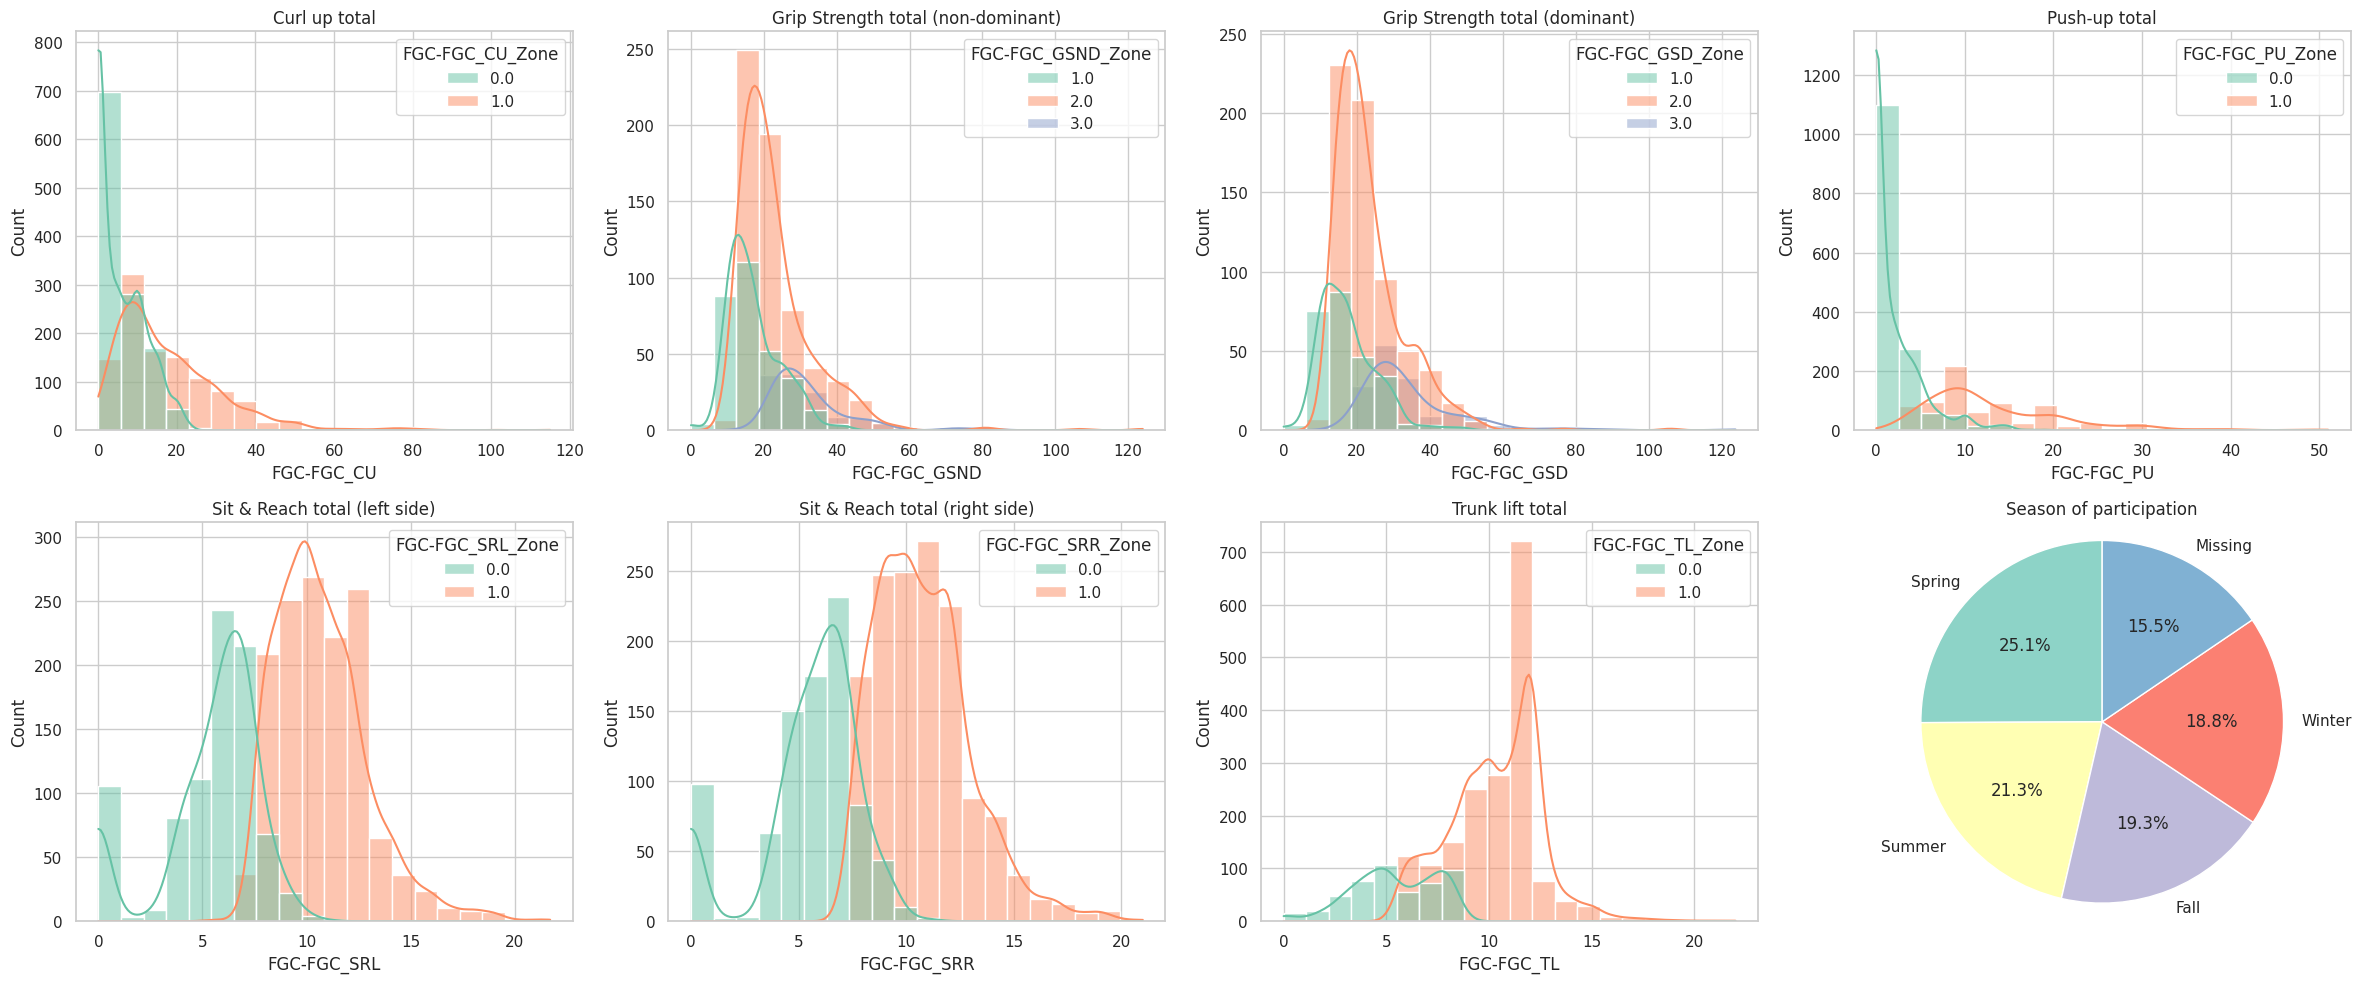

In [87]:
fgc_data_dict = data_dict[data_dict['Instrument'] == 'FitnessGram Child']

fgc_columns = []

for index, row in fgc_data_dict.iterrows():
    if '_Zone' not in row['Field']:
        measure_field = row['Field']
        measure_desc = row['Description']
        
        zone_field = measure_field + '_Zone'
        zone_row = fgc_data_dict[fgc_data_dict['Field'] == zone_field]
        
        if not zone_row.empty:
            zone_desc = zone_row['Description'].values[0]
            fgc_columns.append((measure_field, zone_field, measure_desc, zone_desc))
            
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

for idx, (measure, zone, measure_desc, zone_desc) in enumerate(fgc_columns):
    row = idx // 4
    col = idx % 4
    
    sns.histplot(
        data=train, x=measure,
        hue=zone, bins=20, palette='Set2',
        ax=axes[row, col], kde=True
    )
    axes[row, col].set_title(f'{measure_desc}')

season_counts = train['FGC-Season'].value_counts(normalize=True)
axes[1, 3].pie(
    season_counts, labels=season_counts.index,
    autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("Set3")
)
axes[1, 3].set_title('Season of participation')
axes[1, 3].axis('equal') 

plt.tight_layout()
plt.show()

Most of the distributions are skewed towards lower performance totals.
Strangely, a greater proportion of participants achieved a healthy fitness zone for the trunk lift.
I would expect different ranges for each zone, but the values for different zones overlap significantly. This may be because the zone ranges are different for different ages. 

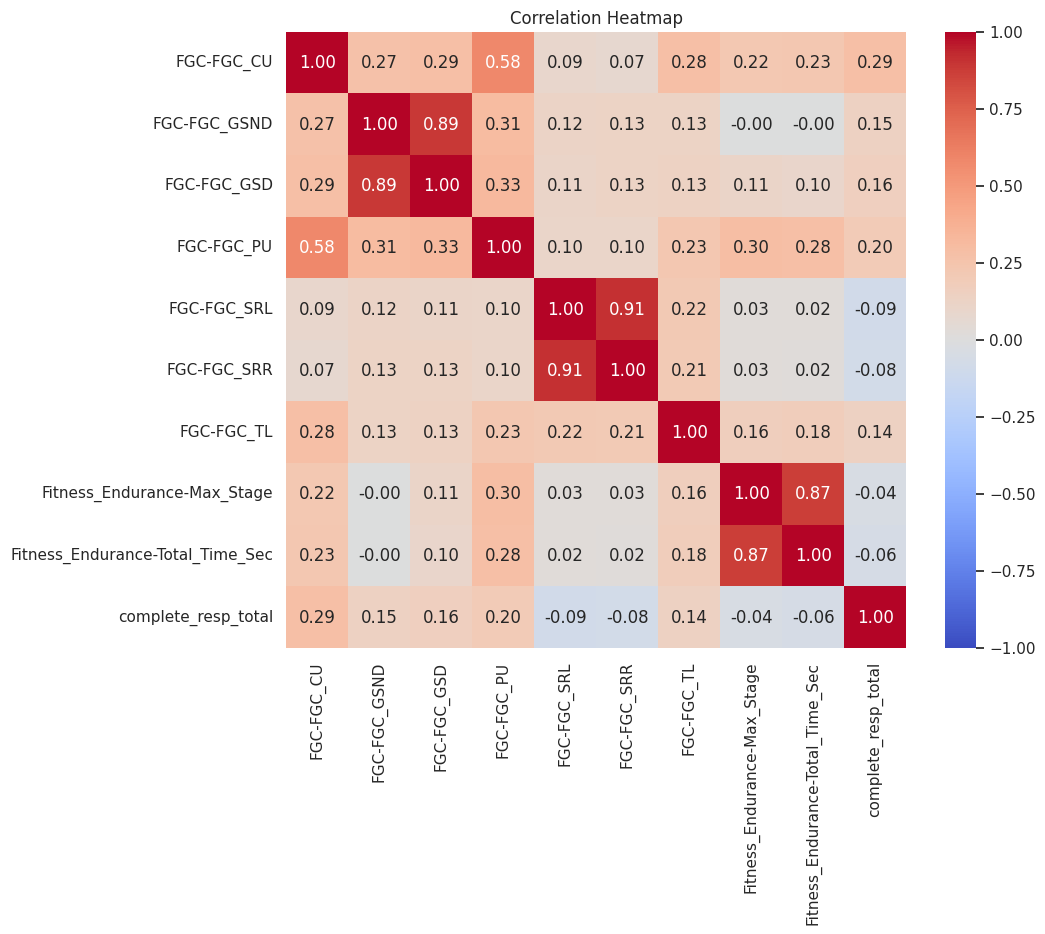

In [88]:
cols = [col for col in train.columns if col.startswith('FGC-') 
        and 'Zone' not in col and 'Season' not in col]
cols.extend(['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec'])

data_subset = train[cols + ['complete_resp_total']]

corr_matrix = data_subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

There are noticeable intercorrelations between the fitness measures (FGC-FGC_GSD (grip strength dominant) and FGC-FGC_GSND (grip strength non-dominant), FGC-FGC_SRL (sit & reach left) and FGC-FGC_SRR (sit & reach right)) and they are expected to be similar.
The relationships with the target variable appear to be a counterintuitive: curl-ups and push-ups show moderate positive relationships with PIU severity, and trunk lift and grip strength show a weak positive correlation, suggesting that physical performance improves as PIU severity increases...
Better performance in fitness tests does not necessarily indicate a higher level of daily physical activity. Besides, fitness measures might reflect past - we do not know the timing of the measurements.
But the main thing to remember here is that physical performance also improves with age, so the positive correlation between physical performance and PIU severity is likely just driven by age.
And here is another unknown: were the fitness tests conducted in a standardized way across all participants?

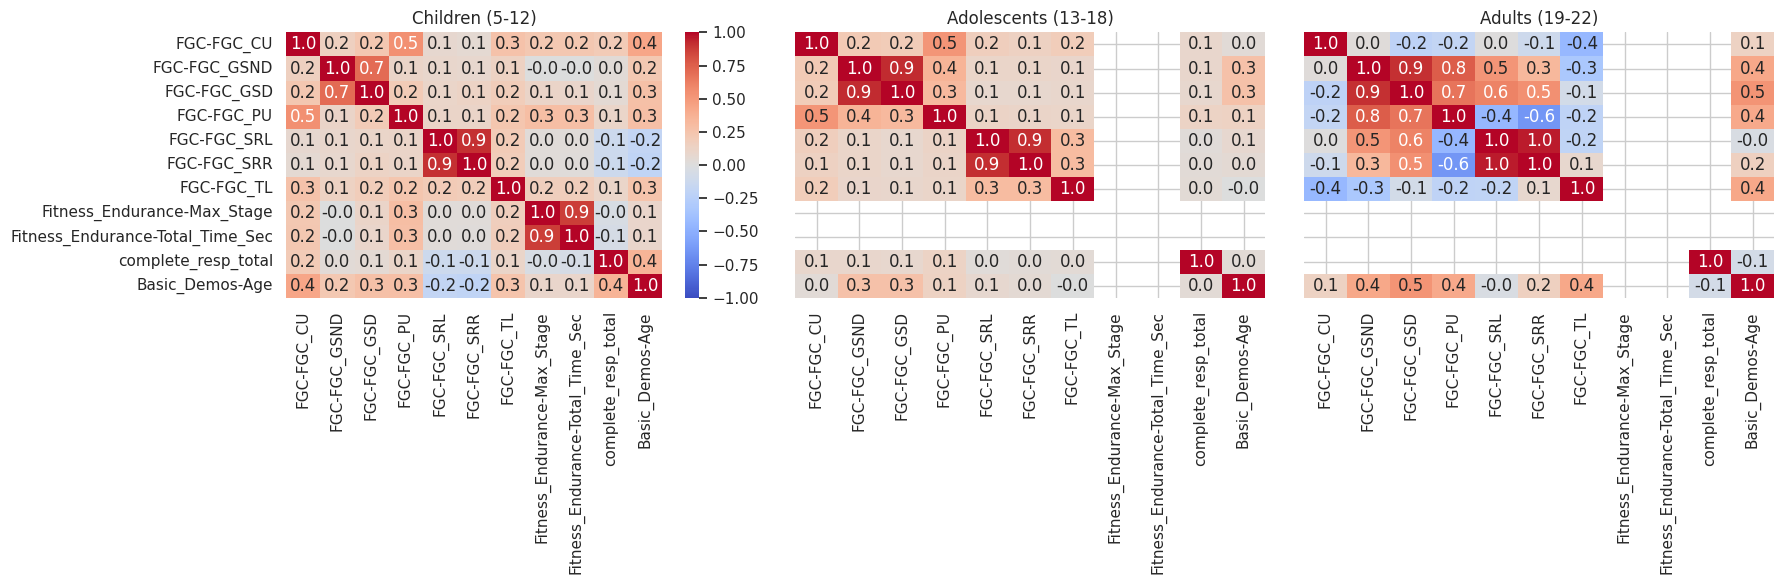

In [89]:
# by age group
age_groups = train['Age Group'].unique()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, age_group in enumerate(age_groups):
    group_data = train[train['Age Group'] == age_group]
    corr_matrix = group_data[cols + ['complete_resp_total', 'Basic_Demos-Age']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f',
                vmin=-1, vmax=1, ax=axes[i], cbar=i == 0)
    axes[i].set_title(f'{age_group}')

plt.tight_layout()
plt.show()

In each age group we see that age correlates well with most measures of physical performance (especially for kids and adults).
The correlation between age and PIU severity persists in children aged 5-12 years, confounding the relationship between fitness and PIU.
For adolescents, the correlations of the target variable with all measures of fitness are weak or null, and for adults who pass the fitness test, only 1 has data on PIU severity.
In overall, fitness measures do not show noticable correlations with PIU severity, and it appears that age may be driving both increased fitness performance and higher PIU severity

In [90]:
# Sleep disturbance

groups.get('Sleep Disturbance Scale', [])

['SDS-Season', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

In [91]:
data = train[train['SDS-SDS_Total_Raw'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with SDS-SDS_Total_Raw data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with SDS-SDS_Total_Raw data: 5 - 22 years


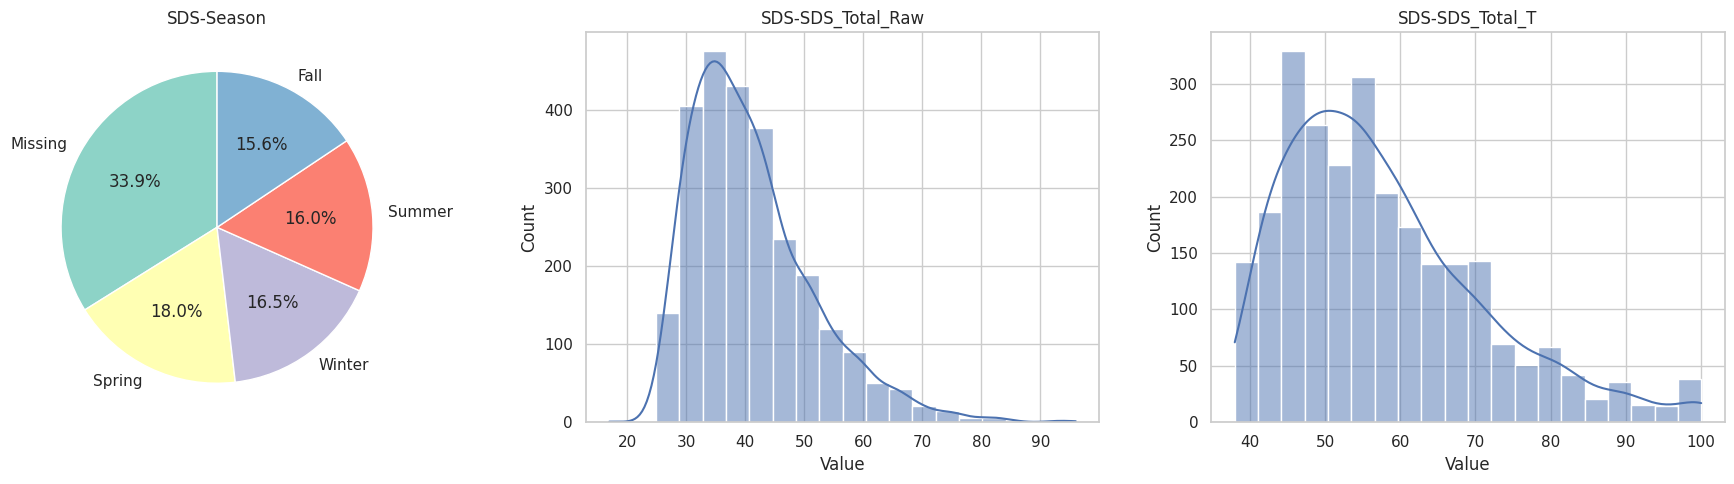

In [92]:
plt.figure(figsize=(18, 5))

# SDS-Season (Pie Chart)
plt.subplot(1, 3, 1)
sds_season_counts = train['SDS-Season'].value_counts(normalize=True)
plt.pie(
    sds_season_counts, 
    labels=sds_season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set3")
)
plt.title('SDS-Season')

# SDS-SDS_Total_Raw
plt.subplot(1, 3, 2)
sns.histplot(train['SDS-SDS_Total_Raw'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_Raw')
plt.xlabel('Value')

# SDS-SDS_Total_T
plt.subplot(1, 3, 3)
sns.histplot(train['SDS-SDS_Total_T'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_T')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [93]:
calculate_stats(train, ['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T'])

count       mean        std   min   25%   50%   75%  \
SDS-SDS_Total_Raw  2609.0  41.088923  10.427433  17.0  33.0  39.0  46.0   
SDS-SDS_Total_T    2606.0  57.763622  13.196091  38.0  47.0  55.0  64.0   

                     max  missing  
SDS-SDS_Total_Raw   96.0     1351  
SDS-SDS_Total_T    100.0     1354

Both the raw and T-scores for sleep disturbance are moderately variable, with some extreme values indicating severe sleep disturbances in a subset of participants.
Further Analysis (coming soon): to explore whether specific demographic factors (e.g., age, gender, season) are associated with higher sleep disturbance scores.

In [94]:
# Physical Activity Questionnaire

groups.get('Physical Activity Questionnaire (Adolescents)', [])

['PAQ_A-Season', 'PAQ_A-PAQ_A_Total']

In [95]:
data = train[train['PAQ_A-PAQ_A_Total'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for Adolescents (with PAQ_A_Total data):"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for Adolescents (with PAQ_A_Total data): 13 - 18 years


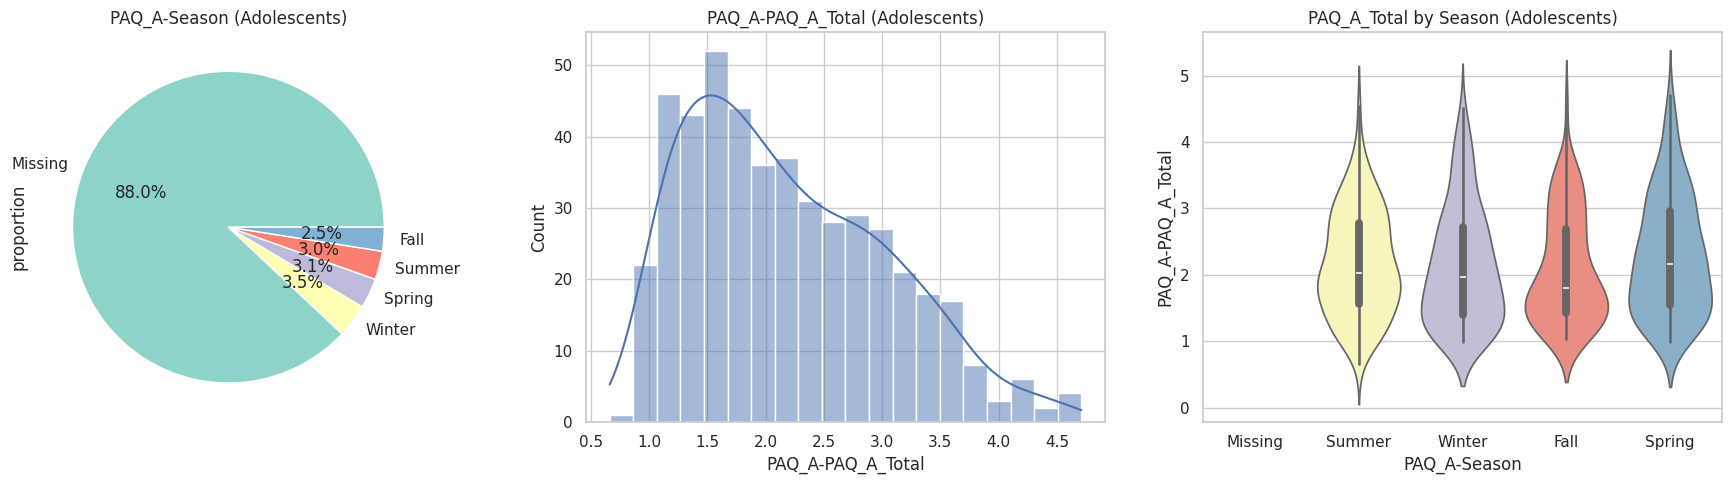

In [96]:
plt.figure(figsize=(18, 5))

# PAQ_A-Season
plt.subplot(1, 3, 1)
train['PAQ_A-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors
)
plt.title('PAQ_A-Season (Adolescents)')

# PAQ_A-PAQ_A_Total
plt.subplot(1, 3, 2)
sns.histplot(train['PAQ_A-PAQ_A_Total'], bins=20, kde=True)
plt.title('PAQ_A-PAQ_A_Total (Adolescents)')

# PAQ_A_Total by Season
plt.subplot(1, 3, 3)
sns.violinplot(x='PAQ_A-Season', y='PAQ_A-PAQ_A_Total', data=train, palette="Set3")
plt.title('PAQ_A_Total by Season (Adolescents)')

plt.tight_layout()
plt.show()

In [97]:
# Children

groups.get('Physical Activity Questionnaire (Children)', [])

['PAQ_C-Season', 'PAQ_C-PAQ_C_Total']

In [98]:
data = train[train['PAQ_C-PAQ_C_Total'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for Children (with PAQ_C_Total data):"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for Children (with PAQ_C_Total data): 7 - 17 years


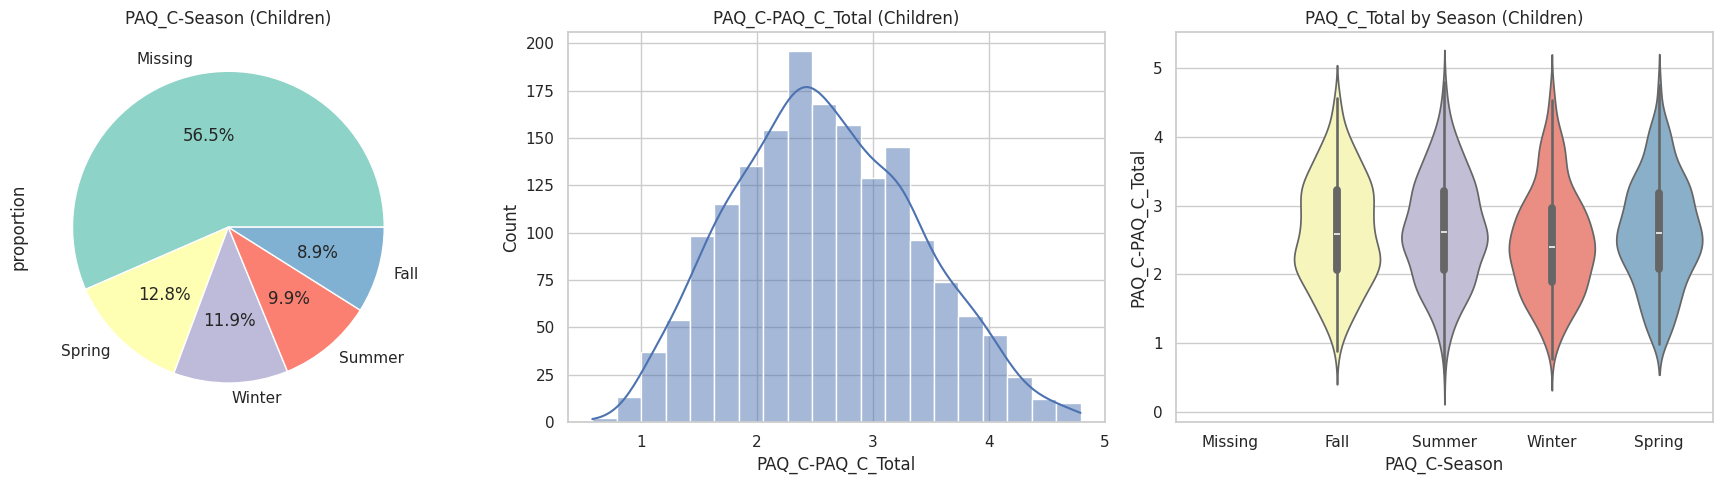

In [99]:
plt.figure(figsize=(18, 5))

# PAQ_C-Season
plt.subplot(1, 3, 1)
train['PAQ_C-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors
)
plt.title('PAQ_C-Season (Children)')

# PAQ_C-PAQ_C_Total
plt.subplot(1, 3, 2)
sns.histplot(train['PAQ_C-PAQ_C_Total'], bins=20, kde=True)
plt.title('PAQ_C-PAQ_C_Total (Children)')

# PAQ_C_Total by Season
plt.subplot(1, 3, 3)
sns.violinplot(x='PAQ_C-Season', y='PAQ_C-PAQ_C_Total', data=train, palette="Set3")
plt.title('PAQ_C_Total by Season (Children)')

plt.tight_layout()
plt.show()

In [100]:
calculate_stats(train, ['PAQ_C-PAQ_C_Total'])

count     mean       std   min   25%   50%   75%   max  \
PAQ_C-PAQ_C_Total                                                            
PAQ_C-PAQ_C_Total  1721.0  2.58955  0.783937  0.58  2.02  2.54  3.16  4.79   

                   missing  
PAQ_C-PAQ_C_Total           
PAQ_C-PAQ_C_Total     2239

The division into adolescents and children seems to be incorrect (participants with data in the children columns (PAQ_C_Total) are 7 - 17 years old - overlapping with those with non-missing data in the adolescents columns - 13 - 18 years old).
Physical activity levels are fairly stable over the seasons, with only minor variations, although are slightly lower in the fall and winter for adolescents and children, respectively.
There are many missing values for these features

In [102]:
# Check if any participants have data for both the children's PAQ (PAQ_C) and adolescents' PAQ (PAQ_A) columns
paq_columns = [col for col in train.columns if 'PAQ' in col]
train[(train['PAQ_A-PAQ_A_Total'].notnull()) &
      (train['PAQ_C-PAQ_C_Total'].notnull())][
    paq_columns + ['Basic_Demos-Age']
]

PAQ_A-Season  PAQ_A-PAQ_A_Total PAQ_C-Season  PAQ_C-PAQ_C_Total  \
3331       Summer               2.27       Spring               2.32   

      Basic_Demos-Age  
3331               13

May be it will make sense to combine PAQ_A-PAQ_A_Total and PAQ_C-PAQ_C_Total into a single column and take the average when both values are present.